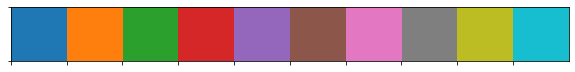

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import h5py

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["font.size"] = 26

#data_dir = "/home/stavros/DATA"
data_dir = "D:/"
cp = sns.color_palette()
sns.palplot(cp)
plt.show()

#### Optimization dynamics
only for reference - do not put on the notes

Note: Black dashed line shows the place that the composite (spin-time) feed forward NN gets stuck

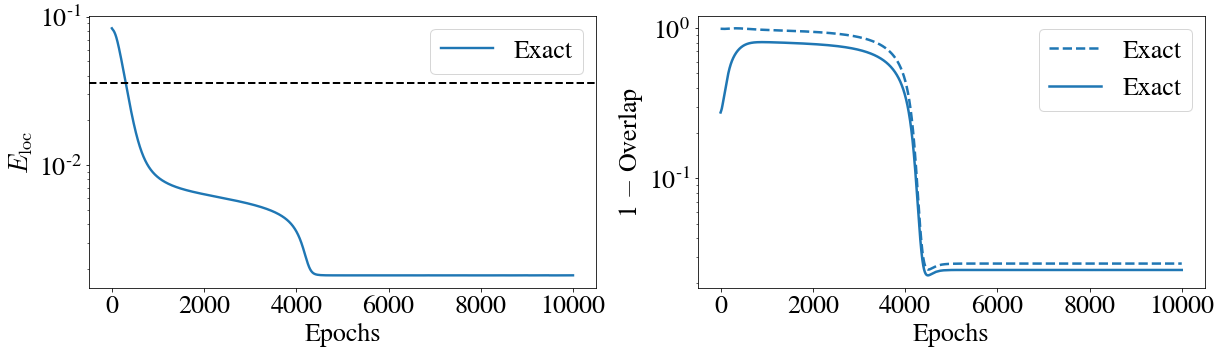

In [4]:
machine_type = "fullwv"
n_sites = 6
time_steps = 20

all_states = h5py.File("{}/ClockV3/histories/allstates_{}_N{}M{}.h5".format(data_dir, machine_type, n_sites, time_steps), "r")

plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.semilogy(all_states["exact_Eloc"][()].real, label="Exact", color=cp[0], linewidth=2.4)
plt.axhline(y=0.03571453, color="black", linewidth=2.0, linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("$E_\mathrm{loc}$")
plt.legend()

plt.subplot(122)
plt.semilogy(1 - all_states["overlaps"][()], label="Exact", linewidth=2.5, color=cp[0], linestyle="--")
plt.semilogy(1 - all_states["avg_overlaps"][()], label="Exact", linewidth=2.5, color=cp[0])
plt.xlabel("Epochs")
plt.ylabel("1 $-$ Overlap")
plt.legend()

plt.show()
all_states.close()

#### Comparison of MPS with full wavefunction ansatz

do not put on notes

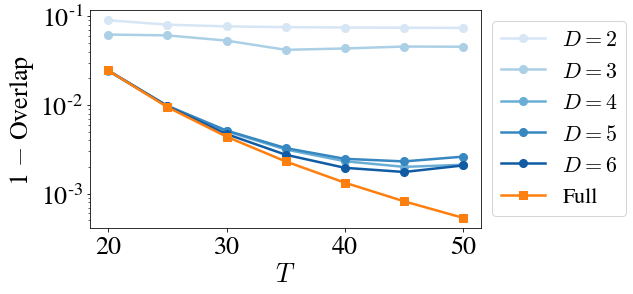

In [12]:
n_sites = 6
D_list = [2, 3, 4, 5, 6]

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")
cseq = sns.color_palette("Blues", len(D_list))


plt.figure(figsize=(7, 4))
for i, D in enumerate(D_list):
    plt.semilogy(file["T_list"], 1 - file["mpsD{}/overlaps/avg".format(D)][()], marker="o", linewidth=2.5, 
                 markersize=8, color=cseq[i], label="$D={}$".format(D))
    #plt.semilogy(T_list, 1 - file["mpsD{}/overlaps/composite".format(D)][()], marker="o", linewidth=2.5, 
    #             markersize=8, color=cseq[i], linestyle="--")
    
plt.semilogy(file["T_list"], 1 - file["fullwv/overlaps/avg"][()], marker="s", linewidth=2.5, markersize=8, 
             color=cp[1], label="Full")
#plt.semilogy(T_list, 1 - file["fullwv/overlaps/composite"][()], marker="o", linewidth=2.5, markersize=8, 
#                 color=cp[1], linestyle="--")
plt.xlabel("$T$")
plt.ylabel("1 $-$ Overlap")
plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize=22)
plt.show()

file.close()

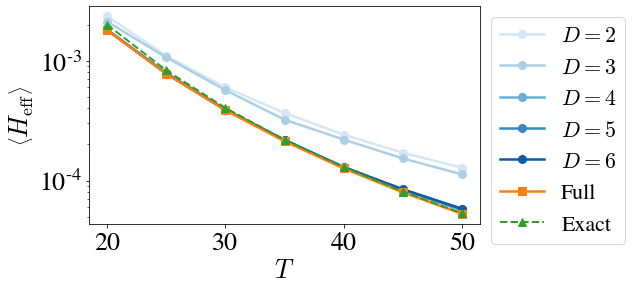

In [10]:
n_sites = 6
D_list = [2, 3, 4, 5, 6]

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")
cseq = sns.color_palette("Blues", len(D_list))

plt.figure(figsize=(7, 4))
for i, D in enumerate(D_list):
    plt.semilogy(file["T_list"], file["mpsD{}/clock_energy".format(D)][()], marker="o", linewidth=2.5, 
                 markersize=8, color=cseq[i], label="$D={}$".format(D))

plt.semilogy(file["T_list"], file["fullwv/clock_energy"][()], marker="s", linewidth=2.5, markersize=8, 
             color=cp[1], label="Full")
plt.semilogy(file["T_list"], file["exact/clock_energy"][()], marker="^", linewidth=2.0, markersize=8, 
             color=cp[2], label="Exact", linestyle="--")
file.close()
    
plt.xlabel("$T$")
plt.ylabel(r"$\left \langle H_\mathrm{eff}\right \rangle$")
plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize=22)
plt.show()

### Comparison of MPS Clock with t-VMC

Plots as a function of $T$

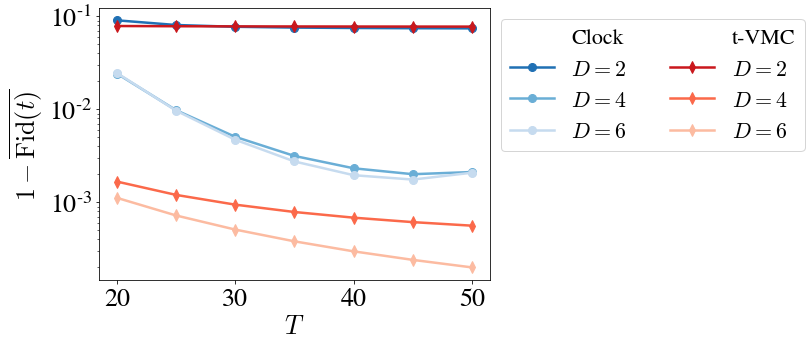

In [19]:
n_sites = 6

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")
cseq = sns.color_palette("Blues", 3)[::-1]
cseqt = sns.color_palette("Reds", 3)[::-1]

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.semilogy(file["T_list"], 1 - file["mpsD2/overlaps/avg"][()], marker="o", linewidth=2.5, 
            markersize=8, color=cseq[0], label="$D=2$")
ax.semilogy(file["T_list"], 1 - file["mpsD4/overlaps/avg"][()], marker="o", linewidth=2.5, 
            markersize=8, color=cseq[1], label="$D=4$")
ax.semilogy(file["T_list"], 1 - file["mpsD6/overlaps/avg"][()], marker="o", linewidth=2.5, 
            markersize=8, color=cseq[2], label="$D=6$")
#plt.semilogy(file["T_list"], file["fullwv/clock_energy"][()], marker="s", linewidth=2.5, markersize=8, 
#             color=cseq[2], label="Full")

ax.semilogy(file["T_list"], 1 - file["tvmc_mpsD2/overlaps/avg"][()], marker="d", linewidth=2.5, 
            markersize=8, color=cseqt[0], label="$D=2$")
ax.semilogy(file["T_list"], 1 - file["tvmc_mpsD4/overlaps/avg"][()], marker="d", linewidth=2.5, 
            markersize=8, color=cseqt[1], label="$D=4$")
ax.semilogy(file["T_list"], 1 - file["tvmc_mpsD6/overlaps/avg"][()], marker="d", linewidth=2.5, 
            markersize=8, color=cseqt[2], label="$D=6$")

file.close()
plt.xlabel("$T$")
plt.ylabel(r"$1 - \overline{\mathrm{Fid}(t)}$")

h, l = ax.get_legend_handles_labels()
ph = [plt.plot([],marker="", ls="")[0]]*2
handles = [ph[0]] + h[:3] + [ph[1]] + h[3:]
labels = ["Clock"] + l[:3] + ["t-VMC"] + l[3:]
plt.legend(handles, labels, bbox_to_anchor=(1.0, 1.0), fontsize=22, ncol=2)
#plt.show()
plt.savefig("fidelity_vs_time_steps.pdf", bbox_inches='tight')

/home/stavros/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


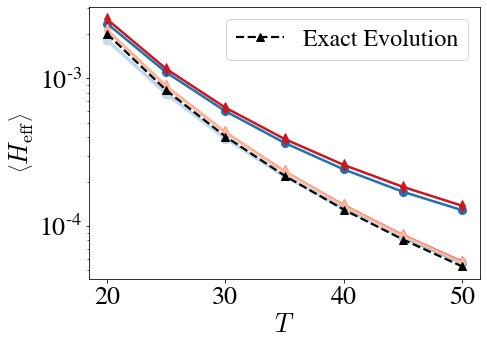

In [20]:
n_sites = 6

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")
cseq = sns.color_palette("Blues", 3)[::-1]
cseqt = sns.color_palette("Reds", 3)[::-1]

plt.figure(figsize=(7, 5))
plt.semilogy(file["T_list"], file["mpsD2/clock_energy"][()], marker="o", linewidth=2.5, 
            markersize=8, color=cseq[0])
plt.semilogy(file["T_list"], file["mpsD4/clock_energy"][()], marker="o", linewidth=2.5, 
            markersize=8, color=cseq[1])
plt.semilogy(file["T_list"], file["mpsD6/clock_energy"][()], marker="o", linewidth=2.5, 
            markersize=8, color=cseq[2])
#plt.semilogy(file["T_list"], file["fullwv/clock_energy"][()], marker="s", linewidth=2.5, markersize=8, 
#             color=cseq[2], label="Full")

plt.semilogy(file["T_list"], file["tvmc_mpsD2/clock_energy"][()], marker="d", linewidth=2.5, 
            markersize=8, color=cseqt[0])
plt.semilogy(file["T_list"], file["tvmc_mpsD4/clock_energy"][()], marker="d", linewidth=2.5, 
            markersize=8, color=cseqt[1])
plt.semilogy(file["T_list"], file["tvmc_mpsD6/clock_energy"][()], marker="d", linewidth=2.5, 
            markersize=8, color=cseqt[2])

plt.semilogy(file["T_list"], file["exact/clock_energy"][()], marker="^", linewidth=2.2, markersize=8, 
             color="black", label="Exact Evolution", linestyle="--")
file.close()
    
plt.xlabel("$T$")
plt.ylabel(r"$\left \langle H_\mathrm{eff}\right \rangle$")
#plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize=22)
plt.legend(fontsize=24)
#plt.show()
plt.savefig("heff_vs_time_steps.pdf", bbox_inches='tight')

Plots as a function of $D$

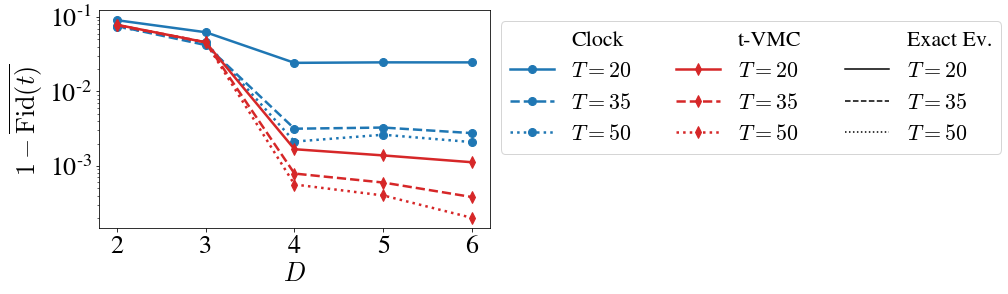

In [21]:
n_sites = 6

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")
T_list_inds = [0, 3, 6]
D_list = [2, 3, 4, 5, 6]
cseq = sns.color_palette("Blues", len(T_list_inds))[::-1]
cseqt = sns.color_palette("Reds", len(T_list_inds))[::-1]
cseqs = sns.color_palette("Greens", len(T_list_inds))[::-1]

clock = np.array([file["mpsD{}/overlaps/avg".format(D)] for D in D_list]).T
sweep = np.array([file["sweep_mpsD{}/overlaps/avg".format(D)] for D in D_list]).T
tvmc = np.array([file["tvmc_mpsD{}/overlaps/avg".format(D)] for D in D_list]).T

linestyles = ["-", "--", ":"]

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
for i, ind in enumerate(T_list_inds):
    ax.semilogy(D_list, 1 - clock[ind], marker="o", linewidth=2.5, 
                markersize=8, color=cp[0], label="$T={}$".format(file["T_list"][ind]),
                linestyle=linestyles[i])

for i, ind in enumerate(T_list_inds):
    ax.semilogy(D_list, 1 - tvmc[ind], marker="d", linewidth=2.5, 
                 markersize=8, color=cp[3], linestyle=linestyles[i],
                label="$T={}$".format(file["T_list"][ind]))
file.close()
    
plt.xlabel("$D$")
plt.ylabel(r"$1 - \overline{\mathrm{Fid}(t)}$")
h, l = ax.get_legend_handles_labels()
ph = [plt.plot([],marker="", linestyle="")[0]]*3
ph_exact = [plt.plot([],marker="", color="black", linestyle=ls)[0] for ls in linestyles]
handles = [ph[0]] + h[:3] + [ph[1]] + h[3:] + [ph[2]] + ph_exact
labels = ["Clock"] + l[:3] + ["t-VMC"] + l[3:] + ["Exact Ev."] + ["$T={}$".format(t) for t in [20, 35, 50]]
plt.legend(handles, labels, bbox_to_anchor=(1.0, 1.0), fontsize=22, ncol=3)
#plt.show()
plt.savefig("fidelity_vs_bond_dim.pdf", bbox_inches='tight')

/home/stavros/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


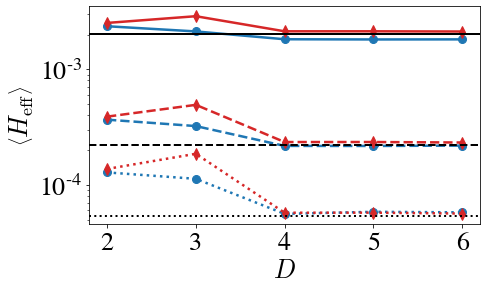

In [73]:
n_sites = 6

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")
T_list_inds = [0, 3, 6]
D_list = [2, 3, 4, 5, 6]

clock = np.array([file["mpsD{}/clock_energy".format(D)] for D in D_list]).T
sweep = np.array([file["sweep_mpsD{}/clock_energy".format(D)] for D in D_list]).T
tvmc = np.array([file["tvmc_mpsD{}/clock_energy".format(D)] for D in D_list]).T

linestyles = ["-", "--", ":"]

plt.figure(figsize=(7, 4))
for i, ind in enumerate(T_list_inds):
    plt.semilogy(D_list, clock[ind], marker="o", linewidth=2.5, 
                markersize=8, color=cp[0], linestyle=linestyles[i])
    
for i, ind in enumerate(T_list_inds):
    plt.semilogy(D_list, tvmc[ind], marker="d", linewidth=2.5, 
                markersize=8, color=cp[3], linestyle=linestyles[i])

for i, ind in enumerate(T_list_inds):
    plt.axhline(y=file["exact/clock_energy"][()][ind], color="black", linestyle=linestyles[i], 
                linewidth=2.0)


file.close()
    
plt.xlabel("$D$")
plt.ylabel(r"$\left \langle H_\mathrm{eff}\right \rangle$")
#plt.show()
plt.savefig("heff_vs_bond_dim.pdf", bbox_inches='tight')

/home/stavros/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


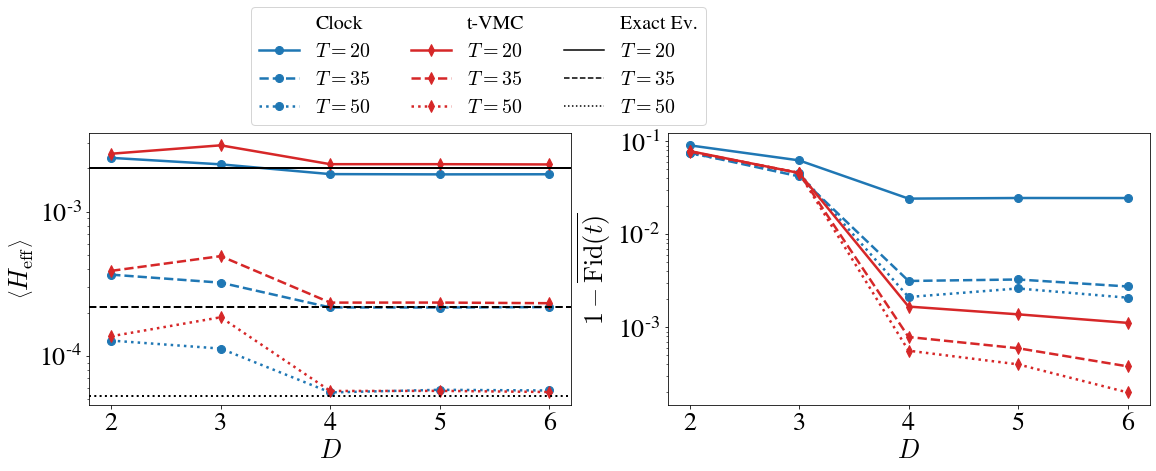

In [5]:
n_sites = 6

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")
T_list_inds = [0, 3, 6]
D_list = [2, 3, 4, 5, 6]
cseq = sns.color_palette("Blues", len(T_list_inds))[::-1]
cseqt = sns.color_palette("Reds", len(T_list_inds))[::-1]
cseqs = sns.color_palette("Greens", len(T_list_inds))[::-1]

clock = np.array([file["mpsD{}/overlaps/avg".format(D)] for D in D_list]).T
sweep = np.array([file["sweep_mpsD{}/overlaps/avg".format(D)] for D in D_list]).T
tvmc = np.array([file["tvmc_mpsD{}/overlaps/avg".format(D)] for D in D_list]).T

linestyles = ["-", "--", ":"]

fig, ax = plt.subplots(1, 2, figsize=(19, 5))
for i, ind in enumerate(T_list_inds):
    ax[1].semilogy(D_list, 1 - clock[ind], marker="o", linewidth=2.5, 
                markersize=8, color=cp[0], label="$T={}$".format(file["T_list"][ind]),
                linestyle=linestyles[i])

for i, ind in enumerate(T_list_inds):
    ax[1].semilogy(D_list, 1 - tvmc[ind], marker="d", linewidth=2.5, 
                 markersize=8, color=cp[3], linestyle=linestyles[i],
                label="$T={}$".format(file["T_list"][ind]))
    

clock = np.array([file["mpsD{}/clock_energy".format(D)] for D in D_list]).T
sweep = np.array([file["sweep_mpsD{}/clock_energy".format(D)] for D in D_list]).T
tvmc = np.array([file["tvmc_mpsD{}/clock_energy".format(D)] for D in D_list]).T

for i, ind in enumerate(T_list_inds):
    ax[0].semilogy(D_list, clock[ind], marker="o", linewidth=2.5, 
                markersize=8, color=cp[0], linestyle=linestyles[i])
    
for i, ind in enumerate(T_list_inds):
    ax[0].semilogy(D_list, tvmc[ind], marker="d", linewidth=2.5, 
                markersize=8, color=cp[3], linestyle=linestyles[i])

for i, ind in enumerate(T_list_inds):
    ax[0].axhline(y=file["exact/clock_energy"][()][ind], color="black", linestyle=linestyles[i], 
                linewidth=2.0)
    
file.close()

ax[0].set_xlabel("$D$")
ax[0].set_ylabel(r"$\left \langle H_\mathrm{eff}\right \rangle$")

ax[1].set_xlabel("$D$")
ax[1].set_ylabel(r"$1 - \overline{\mathrm{Fid}(t)}$")

h, l = ax[1].get_legend_handles_labels()
ph = [plt.plot([],marker="", linestyle="")[0]]*3
ph_exact = [plt.plot([],marker="", color="black", linestyle=ls)[0] for ls in linestyles]
handles = [ph[0]] + h[:3] + [ph[1]] + h[3:] + [ph[2]] + ph_exact
labels = ["Clock"] + l[:3] + ["t-VMC"] + l[3:] + ["Exact Ev."] + ["$T={}$".format(t) for t in [20, 35, 50]]
ax[1].legend(handles, labels, bbox_to_anchor=(0.1, 1.5), fontsize=20, ncol=3)
#plt.show()
plt.savefig("clock_tvmc_comparison_vs_bond_dim.pdf", bbox_inches='tight')

Fidelity dynamics

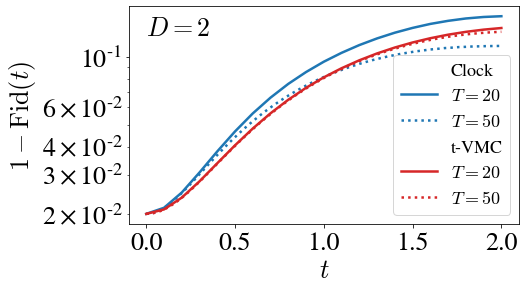

In [29]:
n_sites = 6
t_final = 2.0

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")

T_list_ind = [0, 6]
D = 2
linestyles = ["-", ":"]

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
for i, ind in enumerate(T_list_ind):
    time_steps = file["T_list"][()][ind]
    t = np.linspace(0.0, t_final, time_steps + 1)
    ax.semilogy(t, 1 - file["mpsD{}/overlaps/time/{}".format(D, ind)][()], linewidth=2.5, color=cp[0], 
                 linestyle=linestyles[i], label="$T={}$".format(time_steps))
    
for i, ind in enumerate(T_list_ind):
    time_steps = file["T_list"][()][ind]
    t = np.linspace(0.0, t_final, time_steps + 1)
    ax.semilogy(t, 1 - file["tvmc_mpsD{}/overlaps/time/{}".format(D, ind)][()], linewidth=2.5, color=cp[3], 
                 linestyle=linestyles[i], label="$T={}$".format(time_steps))
    
plt.xlabel("$t$")
plt.ylabel(r"$1 - \mathrm{Fid}(t)$")
h, l = ax.get_legend_handles_labels()
ph = [plt.plot([],marker="", ls="")[0]]*2
handles = [ph[0]] + h[:2] + [ph[1]] + h[2:]
labels = ["Clock"] + l[:2] + ["t-VMC"] + l[2:]
plt.legend(handles, labels, fontsize=18, ncol=1)
plt.text(0.0, 0.125, "$D={}$".format(D))
#plt.show()
plt.savefig("mpsD{}_fidelity_vs_t.pdf".format(D), bbox_inches='tight')

file.close()

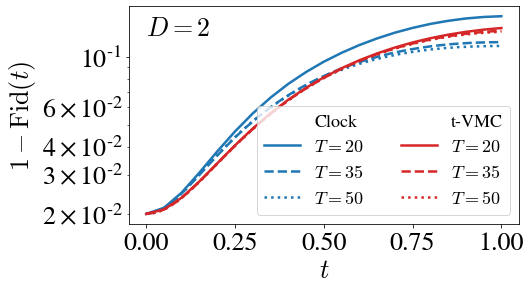

In [117]:
n_sites = 6
t_final = 1.0

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")

T_list_ind = [0, 3, 6]
D = 2
linestyles = ["-", "--", ":"]

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
for i, ind in enumerate(T_list_ind):
    time_steps = file["T_list"][()][ind]
    t = np.linspace(0.0, t_final, time_steps + 1)
    ax.semilogy(t, 1 - file["mpsD{}/overlaps/time/{}".format(D, ind)][()], linewidth=2.5, color=cp[0], 
                 linestyle=linestyles[i], label="$T={}$".format(time_steps))
    
for i, ind in enumerate(T_list_ind):
    time_steps = file["T_list"][()][ind]
    t = np.linspace(0.0, t_final, time_steps + 1)
    ax.semilogy(t, 1 - file["tvmc_mpsD{}/overlaps/time/{}".format(D, ind)][()], linewidth=2.5, color=cp[3], 
                 linestyle=linestyles[i], label="$T={}$".format(time_steps))
    
plt.xlabel("$t$")
plt.ylabel(r"$1 - \mathrm{Fid}(t)$")
h, l = ax.get_legend_handles_labels()
n = len(T_list_ind)
ph = [plt.plot([],marker="", ls="")[0]]*2
handles = [ph[0]] + h[:n] + [ph[1]] + h[n:]
labels = ["Clock"] + l[:n] + ["t-VMC"] + l[n:]
plt.legend(handles, labels, fontsize=18, ncol=2)
plt.text(0.0, 0.125, "$D={}$".format(D))
#plt.show()
plt.savefig("mpsD{}_fidelity_vs_t.pdf".format(D), bbox_inches='tight')

file.close()

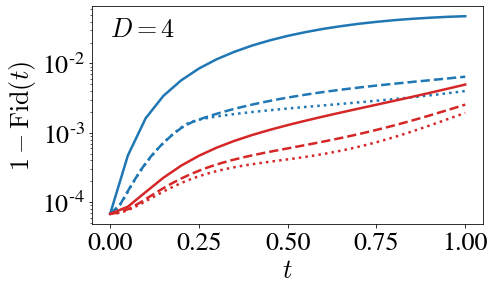

In [116]:
n_sites = 6
t_final = 1.0

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")

T_list_ind = [0, 3, 6]
D = 4
linestyles = ["-", "--", ":"]

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
for i, ind in enumerate(T_list_ind):
    time_steps = file["T_list"][()][ind]
    t = np.linspace(0.0, t_final, time_steps + 1)
    ax.semilogy(t, 1 - file["mpsD{}/overlaps/time/{}".format(D, ind)][()], linewidth=2.5, color=cp[0], 
                 linestyle=linestyles[i], label="$T={}$".format(time_steps))
    
for i, ind in enumerate(T_list_ind):
    time_steps = file["T_list"][()][ind]
    t = np.linspace(0.0, t_final, time_steps + 1)
    ax.semilogy(t, 1 - file["tvmc_mpsD{}/overlaps/time/{}".format(D, ind)][()], linewidth=2.5, color=cp[3], 
                 linestyle=linestyles[i], label="$T={}$".format(time_steps))
    
plt.xlabel("$t$")
plt.ylabel(r"$1 - \mathrm{Fid}(t)$")
plt.text(0.0, 0.025, "$D={}$".format(D))
#plt.show()
plt.savefig("mpsD{}_fidelity_vs_t.pdf".format(D), bbox_inches='tight')

file.close()

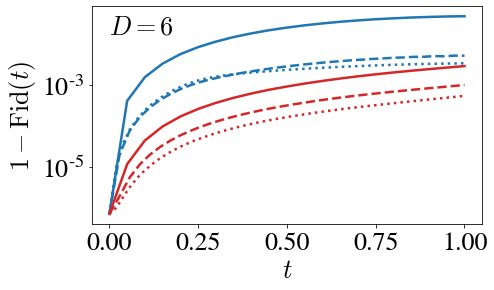

In [115]:
n_sites = 6
t_final = 1.0

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")

T_list_ind = [0, 3, 6]
D = 6
linestyles = ["-", "--", ":"]

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
for i, ind in enumerate(T_list_ind):
    time_steps = file["T_list"][()][ind]
    t = np.linspace(0.0, t_final, time_steps + 1)
    ax.semilogy(t, 1 - file["mpsD{}/overlaps/time/{}".format(D, ind)][()], linewidth=2.5, color=cp[0], 
                 linestyle=linestyles[i], label="$T={}$".format(time_steps))
    
for i, ind in enumerate(T_list_ind):
    time_steps = file["T_list"][()][ind]
    t = np.linspace(0.0, t_final, time_steps + 1)
    ax.semilogy(t, 1 - file["tvmc_mpsD{}/overlaps/time/{}".format(D, ind)][()], linewidth=2.5, color=cp[3], 
                 linestyle=linestyles[i], label="$T={}$".format(time_steps))
    
plt.xlabel("$t$")
plt.ylabel(r"$1 - \mathrm{Fid}(t)$")
plt.text(0.0, 0.018, "$D={}$".format(D))
#plt.show()
plt.savefig("mpsD{}_fidelity_vs_t.pdf".format(D), bbox_inches='tight')

file.close()

### Global Clock vs Sweeps plots

Plots as function of $T$

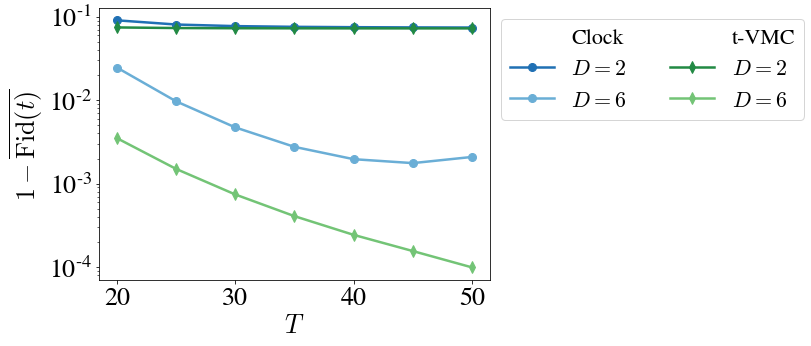

In [85]:
n_sites = 6

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")
cseq = sns.color_palette("Blues", 3)[::-1]
cseqt = sns.color_palette("Greens", 3)[::-1]
n = 2

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.semilogy(file["T_list"], 1 - file["mpsD2/overlaps/avg"][()], marker="o", linewidth=2.5, 
            markersize=8, color=cseq[0], label="$D=2$")
ax.semilogy(file["T_list"], 1 - file["mpsD6/overlaps/avg"][()], marker="o", linewidth=2.5, 
            markersize=8, color=cseq[1], label="$D=6$")

ax.semilogy(file["T_list"], 1 - file["sweep_mpsD2/overlaps/avg"][()], marker="d", linewidth=2.5, 
            markersize=8, color=cseqt[0], label="$D=2$")
ax.semilogy(file["T_list"], 1 - file["sweep_mpsD6/overlaps/avg"][()], marker="d", linewidth=2.5, 
            markersize=8, color=cseqt[1], label="$D=6$")

file.close()
plt.xlabel("$T$")
plt.ylabel(r"$1 - \overline{\mathrm{Fid}(t)}$")

h, l = ax.get_legend_handles_labels()
ph = [plt.plot([],marker="", ls="")[0]]*2
handles = [ph[0]] + h[:n] + [ph[1]] + h[n:]
labels = ["Clock"] + l[:n] + ["t-VMC"] + l[n:]
plt.legend(handles, labels, bbox_to_anchor=(1.0, 1.0), fontsize=22, ncol=2)
#plt.show()
plt.savefig("sweeps_fidelity_vs_time_steps.pdf", bbox_inches='tight')

/home/stavros/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


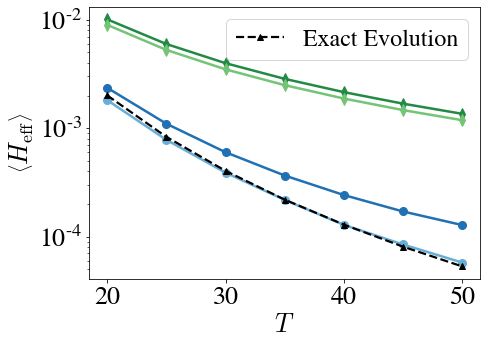

In [87]:
n_sites = 6

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")
cseq = sns.color_palette("Blues", 3)[::-1]
cseqt = sns.color_palette("Greens", 3)[::-1]

plt.figure(figsize=(7, 5))
plt.semilogy(file["T_list"], file["mpsD2/clock_energy"][()], marker="o", linewidth=2.5, 
            markersize=8, color=cseq[0])
plt.semilogy(file["T_list"], file["mpsD6/clock_energy"][()], marker="o", linewidth=2.5, 
            markersize=8, color=cseq[1])

plt.semilogy(file["T_list"], file["sweep_mpsD2/clock_energy"][()], marker="d", linewidth=2.5, 
            markersize=8, color=cseqt[0])
plt.semilogy(file["T_list"], file["sweep_mpsD6/clock_energy"][()], marker="d", linewidth=2.5, 
            markersize=8, color=cseqt[1])

plt.semilogy(file["T_list"], file["exact/clock_energy"][()], marker="^", linewidth=2.2, markersize=6, 
             color="black", label="Exact Evolution", linestyle="--")
file.close()
    
plt.xlabel("$T$")
plt.ylabel(r"$\left \langle H_\mathrm{eff}\right \rangle$")
#plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize=22)
plt.legend(fontsize=24)
#plt.show()
plt.savefig("sweeps_heff_vs_time_steps.pdf", bbox_inches='tight')

Plots as function of $D$

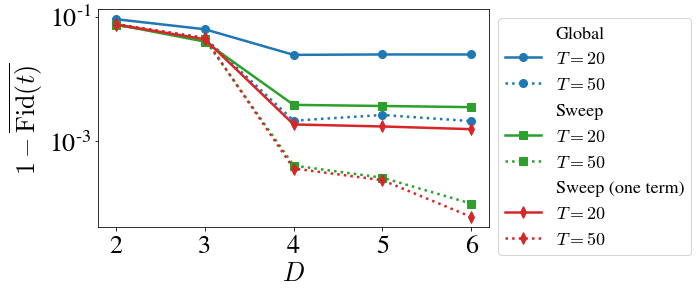

In [40]:
n_sites = 6

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")
T_list_inds = [0, 6]
D_list = [2, 3, 4, 5, 6]

clock = np.array([file["mpsD{}/overlaps/avg".format(D)] for D in D_list]).T
sweep = np.array([file["sweep_mpsD{}/overlaps/avg".format(D)] for D in D_list]).T
oneterm = np.array([file["sweep_oneterm_mpsD{}/overlaps/avg".format(D)] for D in D_list]).T

linestyles = ["-", ":"]

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
for i, ind in enumerate(T_list_inds):
    ax.semilogy(D_list, 1 - clock[ind], marker="o", linewidth=2.5, 
                markersize=8, color=cp[0], label="$T={}$".format(file["T_list"][ind]),
                linestyle=linestyles[i])

for i, ind in enumerate(T_list_inds):
    ax.semilogy(D_list, 1 - sweep[ind], marker="s", linewidth=2.5, 
                 markersize=8, color=cp[2], linestyle=linestyles[i],
                label="$T={}$".format(file["T_list"][ind]))

for i, ind in enumerate(T_list_inds):
    ax.semilogy(D_list, 1 - oneterm[ind], marker="d", linewidth=2.5, 
                 markersize=8, color=cp[3], linestyle=linestyles[i],
                label="$T={}$".format(file["T_list"][ind]))

file.close()
    
plt.xlabel("$D$")
plt.ylabel(r"$1 - \overline{\mathrm{Fid}(t)}$")
h, l = ax.get_legend_handles_labels()
n = len(T_list_inds)

ph = [plt.plot([],marker="", linestyle="")[0]]*3
#ph_exact = [plt.plot([],marker="", color="black", linestyle=ls)[0] for ls in linestyles]
#handles = [ph[0]] + h[:n] + [ph[1]] + h[n:] + [ph[2]] + ph_exact
#labels = ["Clock"] + l[:n] + ["Sweep"] + l[n:] + ["Exact Ev."] + ["$T={}$".format(t) for t in [20, 50]]

handles = [ph[0]] + h[:n] + [ph[1]] + h[n:2*n] + [ph[2]] + h[2*n:]
labels = ["Global"] + l[:n] + ["Sweep"] + l[n:2*n] + ["Sweep (one term)"] + l[2*n:]

plt.legend(handles, labels, bbox_to_anchor=(1.0, 1.0), fontsize=18, ncol=1)
#plt.show()
plt.savefig("sweeps_fidelity_vs_bond_dim.pdf", bbox_inches='tight')

/home/stavros/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


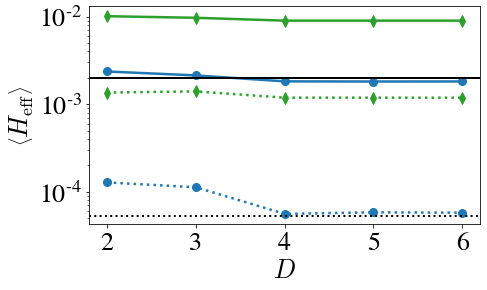

In [7]:
n_sites = 6

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")
T_list_inds = [0, 6]
D_list = [2, 3, 4, 5, 6]

clock = np.array([file["mpsD{}/clock_energy".format(D)] for D in D_list]).T
sweep = np.array([file["sweep_mpsD{}/clock_energy".format(D)] for D in D_list]).T

linestyles = ["-", ":"]

plt.figure(figsize=(7, 4))
for i, ind in enumerate(T_list_inds):
    plt.semilogy(D_list, clock[ind], marker="o", linewidth=2.5, 
                markersize=8, color=cp[0], linestyle=linestyles[i])
    
for i, ind in enumerate(T_list_inds):
    plt.semilogy(D_list, sweep[ind], marker="d", linewidth=2.5, 
                markersize=8, color=cp[2], linestyle=linestyles[i])

for i, ind in enumerate(T_list_inds):
    plt.axhline(y=file["exact/clock_energy"][()][ind], color="black", linestyle=linestyles[i], 
                linewidth=2.0)


file.close()
    
plt.xlabel("$D$")
plt.ylabel(r"$\left \langle H_\mathrm{eff}\right \rangle$")
#plt.show()
plt.savefig("sweeps_heff_vs_bond_dim.pdf", bbox_inches='tight')

/home/stavros/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


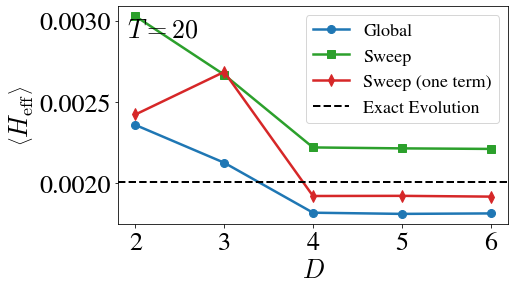

In [6]:
n_sites = 6

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")
D_list = [2, 3, 4, 5, 6]

clock = np.array([file["mpsD{}/clock_energy".format(D)] for D in D_list]).T
sweep = np.array([file["sweepfixed2_mpsD{}/clock_energy".format(D)] for D in D_list]).T
oneterm = np.array([file["sweep_oneterm_mpsD{}/clock_energy".format(D)] for D in D_list]).T

linestyles = ["-", ":"]
ind = 0

plt.figure(figsize=(7, 4))
plt.plot(D_list, clock[ind], marker="o", linewidth=2.5, 
            markersize=8, color=cp[0], label="Global")
plt.plot(D_list, sweep[ind], marker="s", linewidth=2.5, 
             markersize=8, color=cp[2], label="Sweep")
plt.plot(D_list, oneterm[ind], marker="d", linewidth=2.5, 
             markersize=8, color=cp[3], label="Sweep (one term)")
plt.axhline(y=file["exact/clock_energy"][()][ind], color="black", linestyle="--",
            linewidth=2.0, label="Exact Evolution")

file.close()
    
plt.text(1.9, 0.0029, "$T=20$")
plt.xlabel("$D$")
plt.ylabel(r"$\left \langle H_\mathrm{eff}\right \rangle$")
plt.legend(fontsize=18)
#plt.show()
plt.savefig("sweepsT20_heff_vs_bond_dim.pdf", bbox_inches='tight')

/home/stavros/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


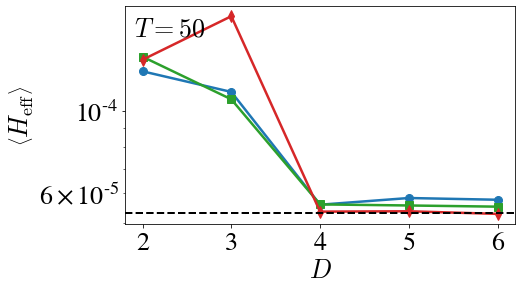

In [14]:
n_sites = 6

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")
D_list = [2, 3, 4, 5, 6]

clock = np.array([file["mpsD{}/clock_energy".format(D)] for D in D_list]).T
sweep = np.array([file["sweepfixed2_mpsD{}/clock_energy".format(D)] for D in D_list]).T
oneterm = np.array([file["sweep_oneterm_mpsD{}/clock_energy".format(D)] for D in D_list]).T

linestyles = ["-", ":"]
ind = 6

plt.figure(figsize=(7, 4))
plt.semilogy(D_list, clock[ind], marker="o", linewidth=2.5, 
            markersize=8, color=cp[0])
plt.semilogy(D_list, sweep[1], marker="s", linewidth=2.5, 
             markersize=8, color=cp[2])
plt.semilogy(D_list, oneterm[ind], marker="d", linewidth=2.5, 
             markersize=8, color=cp[3])
plt.axhline(y=file["exact/clock_energy"][()][ind], color="black", linestyle="--",
            linewidth=2.0)

file.close()
    
plt.xlabel("$D$")
plt.ylabel(r"$\left \langle H_\mathrm{eff}\right \rangle$")
plt.text(1.9, 0.00016, "$T=50$")
#plt.show()
plt.savefig("sweepsT50_heff_vs_bond_dim.pdf", bbox_inches='tight')

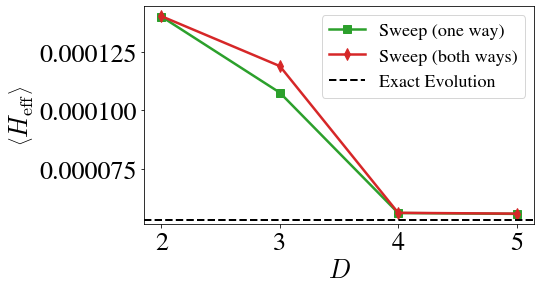

In [26]:
n_sites = 6

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")
D_list = [2, 3, 4, 5]

sweep = np.array([file["sweepfixed2_mpsD{}/clock_energy".format(D)] for D in D_list]).T
sweep_bothways = np.array([file["sweepbothways_mpsD{}/clock_energy".format(D)] for D in D_list]).T

linestyles = ["-", ":"]

plt.figure(figsize=(7, 4))
plt.plot(D_list, sweep[1], marker="s", linewidth=2.5, 
             markersize=8, color=cp[2], label="Sweep (one way)")
plt.plot(D_list, sweep_bothways[0], marker="d", linewidth=2.5, 
             markersize=8, color=cp[3], label="Sweep (both ways)")
plt.axhline(y=file["exact/clock_energy"][()][-1], color="black", linestyle="--",
            linewidth=2.0, label="Exact Evolution")

file.close()

plt.xlabel("$D$")
plt.ylabel(r"$\left \langle H_\mathrm{eff}\right \rangle$")
plt.legend(fontsize=18)
plt.show()

Fidelity dynamics

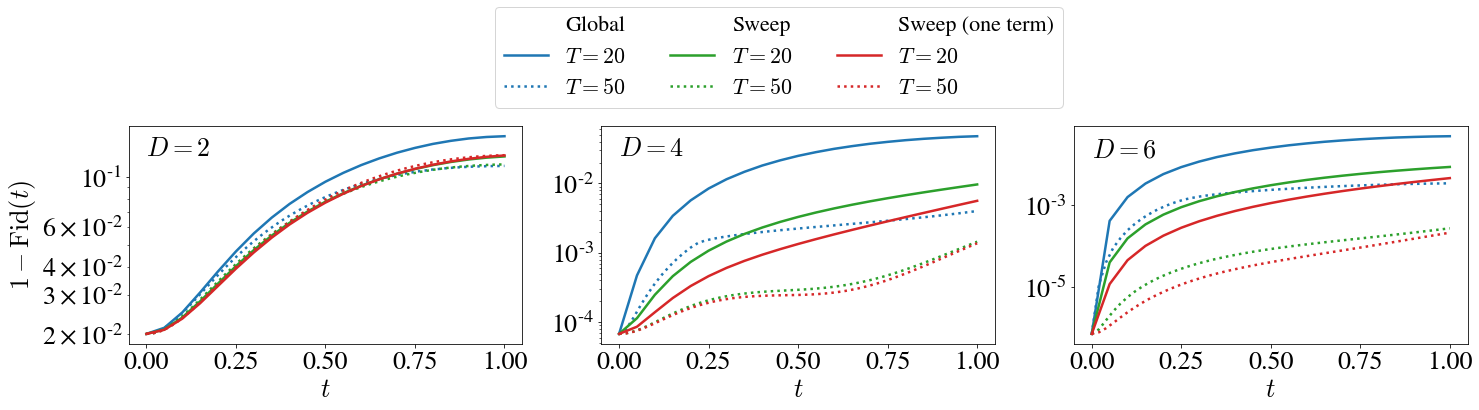

In [17]:
n_sites = 6
t_final = 1.0

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")

T_list_ind = [0, 6]
linestyles = ["-", ":"]

fig, ax = plt.subplots(1, 3, figsize=(24, 4))
for p, D in enumerate([2, 4, 6]):
    for i, ind in enumerate(T_list_ind):
        time_steps = file["T_list"][()][ind]
        t = np.linspace(0.0, t_final, time_steps + 1)
        ax[p].semilogy(t, 1 - file["mpsD{}/overlaps/time/{}".format(D, ind)][()], linewidth=2.5, color=cp[0], 
                     linestyle=linestyles[i], label="$T={}$".format(time_steps))

    for i, ind in enumerate(T_list_ind):
        time_steps = file["T_list"][()][ind]
        t = np.linspace(0.0, t_final, time_steps + 1)
        ax[p].semilogy(t, 1 - file["sweep_mpsD{}/overlaps/time/{}".format(D, ind)][()], linewidth=2.5, color=cp[2], 
                     linestyle=linestyles[i], label="$T={}$".format(time_steps))

    for i, ind in enumerate(T_list_ind):
        time_steps = file["T_list"][()][ind]
        t = np.linspace(0.0, t_final, time_steps + 1)
        ax[p].semilogy(t, 1 - file["sweep_oneterm_mpsD{}/overlaps/time/{}".format(D, ind)][()], linewidth=2.5, color=cp[3], 
                    linestyle=linestyles[i], label="$T={}$".format(time_steps))
    
    ax[p].set_xlabel("$t$")
    #ax[p].set_ylabel(r"$1 - \mathrm{Fid}(t)$")

ax[0].set_ylabel(r"$1 - \mathrm{Fid}(t)$")
h, l = ax[0].get_legend_handles_labels()
n = len(T_list_ind)

ph = [plt.plot([],marker="", linestyle="")[0]]*3
handles = [ph[0]] + h[:n] + [ph[1]] + h[n:2*n] + [ph[2]] + h[2*n:]
labels = ["Global"] + l[:n] + ["Sweep"] + l[n:2*n] + ["Sweep (one term)"] + l[2*n:]

plt.legend(handles, labels, bbox_to_anchor=(0.0, 1.6), fontsize=22, ncol=3)
ax[2].text(0.0, 0.015, "$D=6$")
ax[1].text(0.0, 0.025, "$D=4$")
ax[0].text(0.0, 0.125, "$D=2$")
#plt.show()
plt.savefig("sweeps_mpsD246_fidelity_vs_t_old.pdf".format(D), bbox_inches='tight')
file.close()

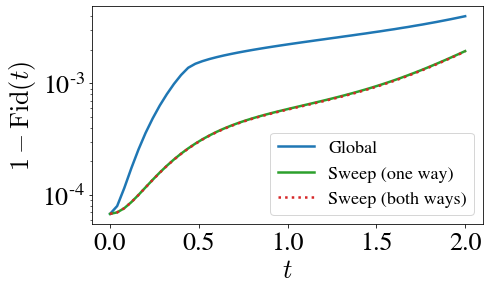

In [30]:
n_sites = 6
t_final = 2.0

file = h5py.File("{}/ClockV3/everything_tf1N{}.h5".format(data_dir, n_sites), "r")

D = 4

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
time_steps = file["T_list"][()][-1]
t = np.linspace(0.0, t_final, time_steps + 1)
ax.semilogy(t, 1 - file["mpsD{}/overlaps/time/{}".format(D, 6)][()], linewidth=2.5, color=cp[0], 
            label="Global")
ax.semilogy(t, 1 - file["sweepfixed2_mpsD{}/overlaps/time/{}".format(D, 1)][()], linewidth=2.5, color=cp[2], 
            label="Sweep (one way)")
ax.semilogy(t, 1 - file["sweepbothways_mpsD{}/overlaps/time/{}".format(D, 0)][()], linewidth=2.5, color=cp[3], 
            label="Sweep (both ways)", linestyle=":")
    
plt.xlabel("$t$")
plt.ylabel(r"$1 - \mathrm{Fid}(t)$")
plt.legend(fontsize=18)
plt.show()

file.close()

### Full wavefunction plots

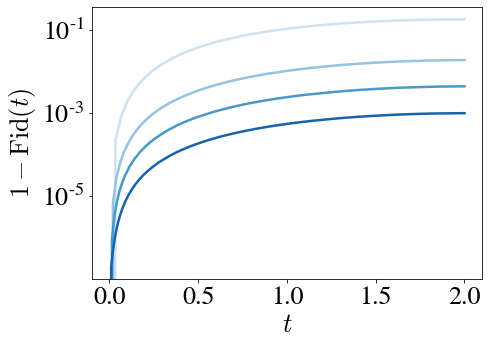

In [47]:
n_sites = 6
t_final = 2.0

file = h5py.File("{}/ClockV3/observables/fullwv_tf2_N{}.h5".format(data_dir, n_sites), "r")
cseq = sns.color_palette("Blues", len(file["T_list"][()]))

plt.figure(figsize=(7, 5))
for i, time_steps in enumerate(file["T_list"]):
    t = np.linspace(0.0, t_final, time_steps + 1)
    plt.semilogy(t, 1 - file["overlaps/time/{}".format(i)][()], linewidth=2.5, color=cseq[i], 
                 label="$T={}$".format(time_steps))
plt.xlabel("$t$")
plt.ylabel(r"$1 - \mathrm{Fid}(t)$")
#plt.show()
plt.savefig("fullwv_fidelity_vs_t.pdf", bbox_inches='tight')


file.close()

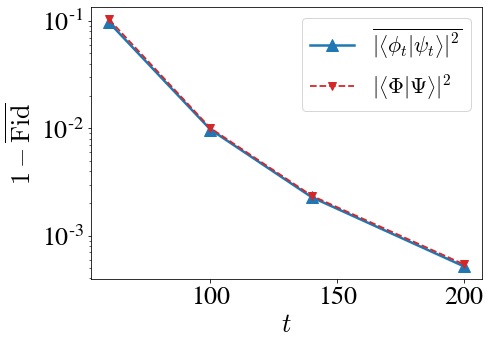

In [45]:
n_sites = 6
t_final = 2.0

file = h5py.File("{}/ClockV3/observables/fullwv_tf2_N{}.h5".format(data_dir, n_sites), "r")
cseq = sns.color_palette("Blues", len(file["T_list"][()]))

plt.figure(figsize=(7, 5))
t = np.linspace(0.0, t_final, time_steps + 1)
plt.semilogy(file["T_list"], 1 - file["overlaps/avg"][()], linewidth=2.5, color=cp[0], marker="^", 
             markersize=12, label=r"$\overline{|\left \langle \phi _t | \psi _t \right \rangle|^2}$")
plt.semilogy(file["T_list"], 1 - file["overlaps/composite"][()], linewidth=1.8, linestyle="--",
             color=cp[3], marker="v", markersize=8, label=r"$|\left \langle \Phi | \Psi \right \rangle|^2$")
plt.xlabel("$t$")
plt.ylabel(r"$1 - \overline{\mathrm{Fid}}$")
plt.legend(fontsize=22)
#plt.show()
plt.savefig("fullwv_fidelity_avg.pdf", bbox_inches='tight')


file.close()

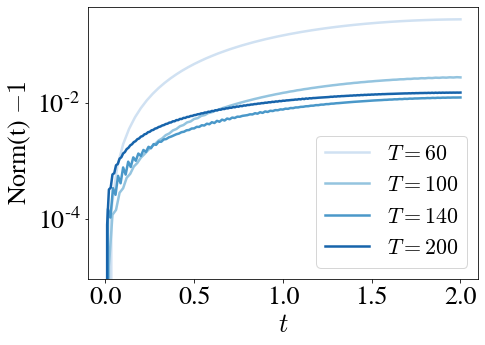

In [46]:
n_sites = 6
t_final = 2.0

file = h5py.File("{}/ClockV3/observables/fullwv_tf2_N{}.h5".format(data_dir, n_sites), "r")
cseq = sns.color_palette("Blues", len(file["T_list"][()]))

plt.figure(figsize=(7, 5))
for i, time_steps in enumerate(file["T_list"]):
    t = np.linspace(0.0, t_final, time_steps + 1)
    plt.semilogy(t, file["metrics/clock/norm/{}".format(i)][()] - 1, linewidth=2.5, color=cseq[i], 
                 label="$T={}$".format(time_steps))
plt.xlabel("$t$")
#plt.ylabel(r"$|\left \langle \psi _t | \psi _t\right \rangle |^2 - 1$")
plt.ylabel("Norm(t) $- 1$")
plt.legend(fontsize=22)
#plt.show()
plt.savefig("fullwv_norm_vs_t.pdf", bbox_inches='tight')

file.close()

C:\Users\SU\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


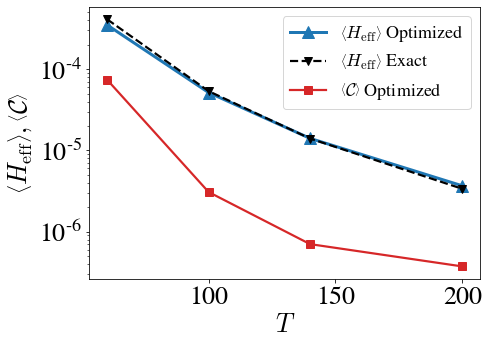

In [26]:
n_sites = 6
t_final = 2.0

file = h5py.File("{}/ClockV3/observables/fullwv_tf2_N{}.h5".format(data_dir, n_sites), "r")
cseq = sns.color_palette("Blues", len(file["T_list"][()]))

plt.figure(figsize=(7, 5))
plt.semilogy(file["T_list"], file["metrics/clock/clock_energy"][()], linewidth=3.0, color=cp[0],
         label=r"$\left \langle H_\mathrm{eff}\right \rangle$ Optimized", marker="^", markersize=12)
plt.semilogy(file["T_list"], file["metrics/exact/clock_energy"][()], linewidth=2.2, color="black", 
                 label=r"$\left \langle H_\mathrm{eff}\right \rangle$ Exact", marker="v", linestyle="--", markersize=8)

plt.semilogy(file["T_list"], file["metrics/clock/exact_clock_energy"][()], linewidth=2.2, color=cp[3],
         label=r"$\left \langle \mathcal{C}\right \rangle$ Optimized", marker="s", markersize=8)
#plt.semilogy(file["T_list"], file["metrics/exact/exact_clock_energy"][()], linewidth=2.2, color="black",
#         label=r"$\left \langle \mathcal{C}\right \rangle$ Exact", marker="o", markersize=8)
plt.xlabel("$T$")
plt.ylabel(r"$\left \langle H_\mathrm{eff}\right \rangle , \left \langle \mathcal{C}\right \rangle $")
plt.legend(fontsize=18)
#plt.show()
plt.savefig("fullwv_clock_energy.pdf", bbox_inches='tight')

file.close()

C:\Users\SU\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


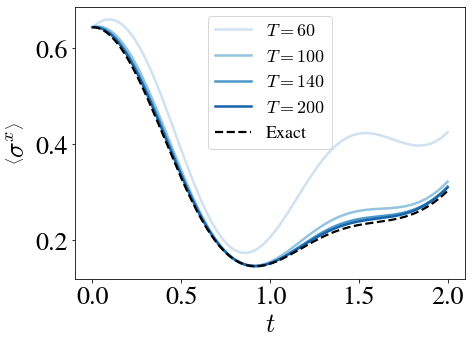

In [25]:
n_sites = 6
t_final = 2.0

file = h5py.File("{}/ClockV3/observables/fullwv_tf2_N{}.h5".format(data_dir, n_sites), "r")
cseq = sns.color_palette("Blues", len(file["T_list"][()]))

plt.figure(figsize=(7, 5))
for i, time_steps in enumerate(file["T_list"]):
    t = np.linspace(0.0, t_final, time_steps + 1)
    plt.plot(t, file["metrics/clock/sigma_x/{}".format(i)][()], linewidth=2.5, color=cseq[i], 
             label="$T={}$".format(time_steps))
plt.plot(t, file["metrics/exact/sigma_x/{}".format(i)][()], linewidth=2.2, color="black", 
                 label="Exact", linestyle="--")
plt.xlabel("$t$")
plt.ylabel(r"$\left \langle \sigma ^x\right \rangle $")
plt.legend(fontsize=18)
#plt.show()
plt.savefig("fullwv_sigmax_vs_t.pdf", bbox_inches='tight')

file.close()

C:\Users\SU\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


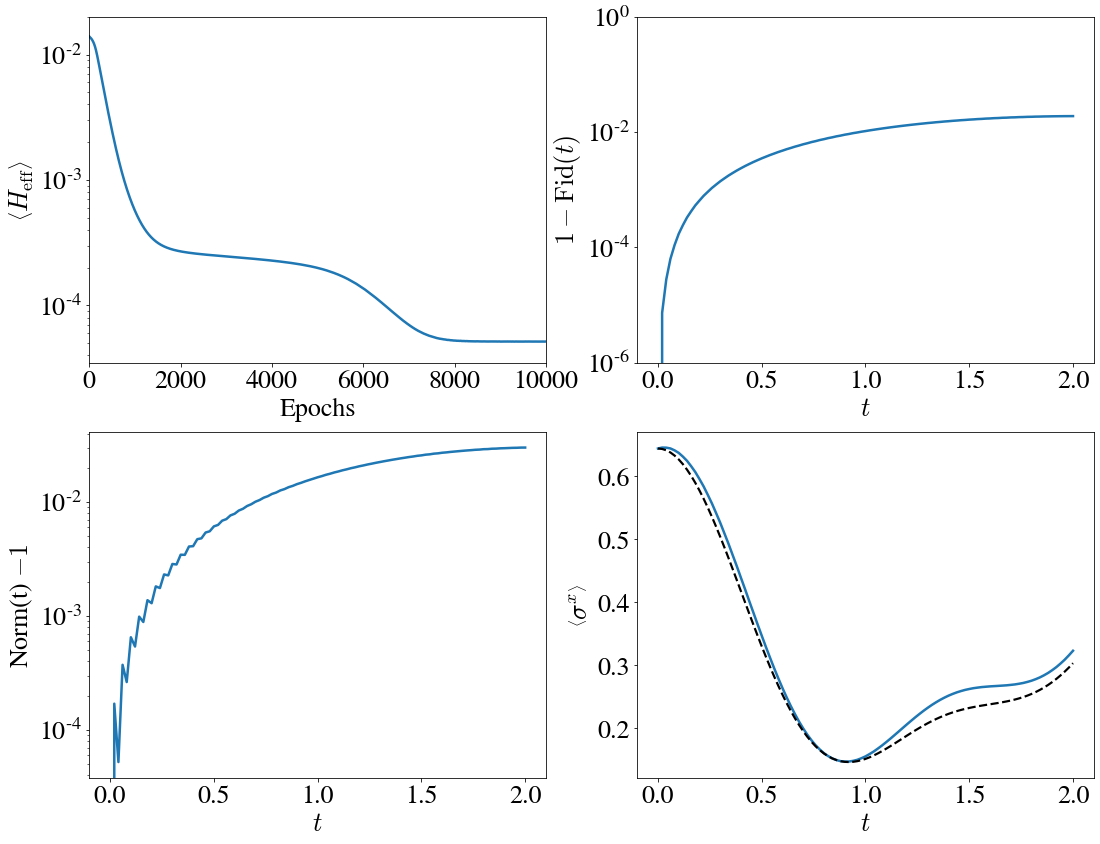

In [83]:
n_sites = 6
time_steps = 100
t_grid = np.linspace(0, 2.0, time_steps + 1)

file = h5py.File("{}/ClockV3/histories/allstates_tf2_withoverlap_fullwv_N{}M{}.h5".format(data_dir, n_sites, time_steps), "r")

exact_file = h5py.File("{}/ClockV3/observables/fullwv_tf2_N{}.h5".format(data_dir, n_sites), "r")
exact_sigma_x = exact_file["metrics/exact/sigma_x/{}".format(1)][()]
exact_file.close()

plt.figure(figsize=(18, 14))
plt.subplot(221)
plt.semilogy(file["exact_Eloc"][()].real, label="Exact", color=cp[0], linewidth=2.5)
plt.xlabel("Epochs")
plt.ylabel(r"$\left \langle H_\mathrm{eff} \right \rangle$")
plt.xlim([0, n_epochs])
plt.ylim([3.5 * 1e-5, 2e-2])
    
plt.subplot(222)
plt.semilogy(t_grid, 1 - file["time_overlaps"][()][-1], color=cp[0], linewidth=2.5)
plt.xlabel("$t$")
plt.ylabel(r"$1 - \mathrm{Fid}(t)$")
plt.ylim([1e-6, 1.0])

plt.subplot(223)
plt.semilogy(t_grid, file["time_norm"][()][-1] - 1, color=cp[0], linewidth=2.5)
plt.xlabel("$t$")
plt.ylabel(r"Norm(t) $- 1$")
    
plt.subplot(224)
plt.plot(t_grid, file["time_sigma_x"][()][-1], color=cp[0], linewidth=2.5)
plt.plot(t_grid, exact_sigma_x, linewidth=2.2, color="black", linestyle="--", label="Exact Evolution")
plt.legend()
plt.xlabel("$t$")
plt.ylabel(r"$\left \langle \sigma ^x\right \rangle $")
    
plt.show()
file.close()

In [76]:
file = h5py.File("{}/ClockV3/histories/allstates_tf2_withoverlap_fullwv_N{}M{}.h5".format(data_dir, n_sites, time_steps), "r")
print(file["time_norm"][()][-1])
file.close()

[1.         1.0001701  1.00005228 1.00037319 1.00026338 1.00065103
 1.00054013 1.00098778 1.00088647 1.0013774  1.00129591 1.0018209
 1.0017601  1.00231748 1.00227419 1.00286334 1.00283556 1.00345259
 1.00344484 1.00407583 1.00410414 1.00472653 1.00480852 1.0054071
 1.00554573 1.00612288 1.00630651 1.00687172 1.00709079 1.00764419
 1.00790139 1.0084336  1.0087341  1.00924206 1.00957757 1.01007478
 1.01042304 1.01092939 1.01127235 1.01179385 1.01213257 1.01265745
 1.01300422 1.01351789 1.01388216 1.01437413 1.01476329 1.01522343
 1.01564377 1.01606661 1.01651537 1.01690799 1.01736927 1.01774894
 1.01820334 1.01858191 1.01902401 1.01939606 1.01983325 1.02019145
 1.02062173 1.020974   1.02138314 1.0217399  1.02212246 1.02247871
 1.02284379 1.02318779 1.02354165 1.02387021 1.02421249 1.0245216
 1.02486052 1.02513531 1.02548529 1.02571441 1.02607643 1.02626833
 1.026623   1.02680262 1.02712094 1.02731425 1.02757644 1.0277903
 1.02800272 1.02821601 1.02841021 1.02858445 1.02879561 1.02890776

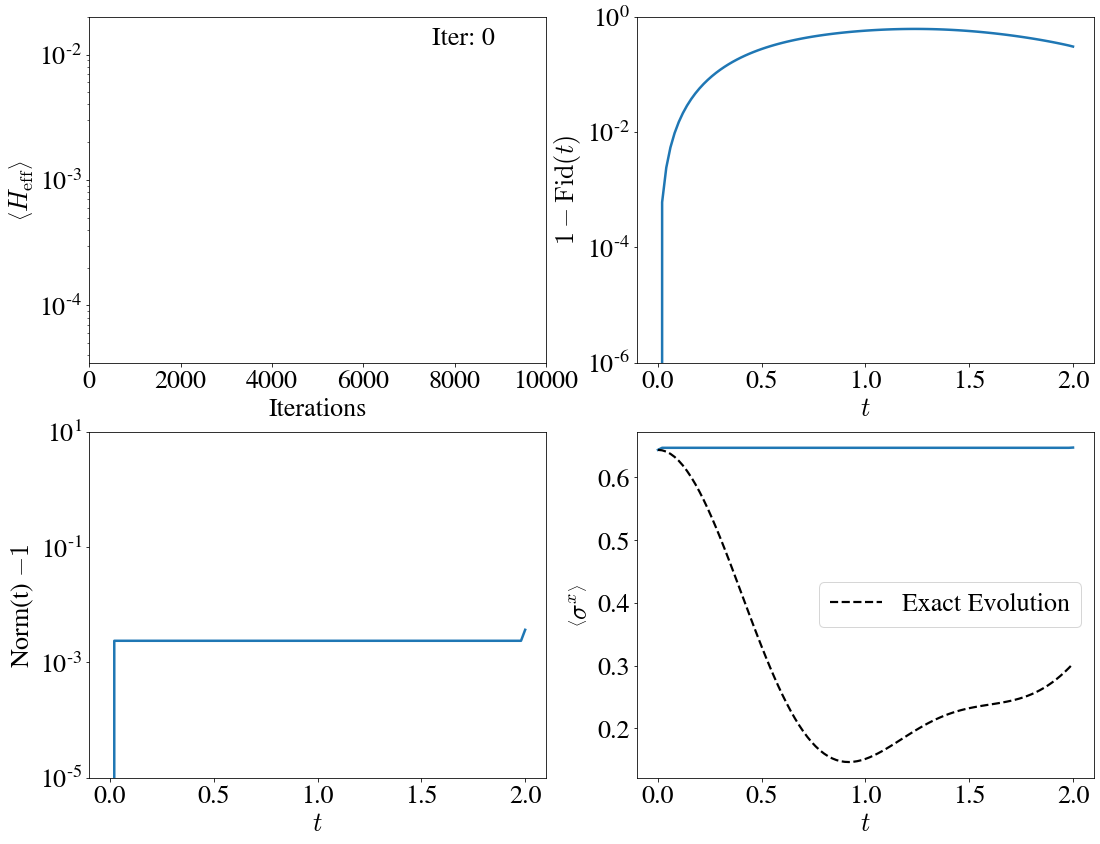

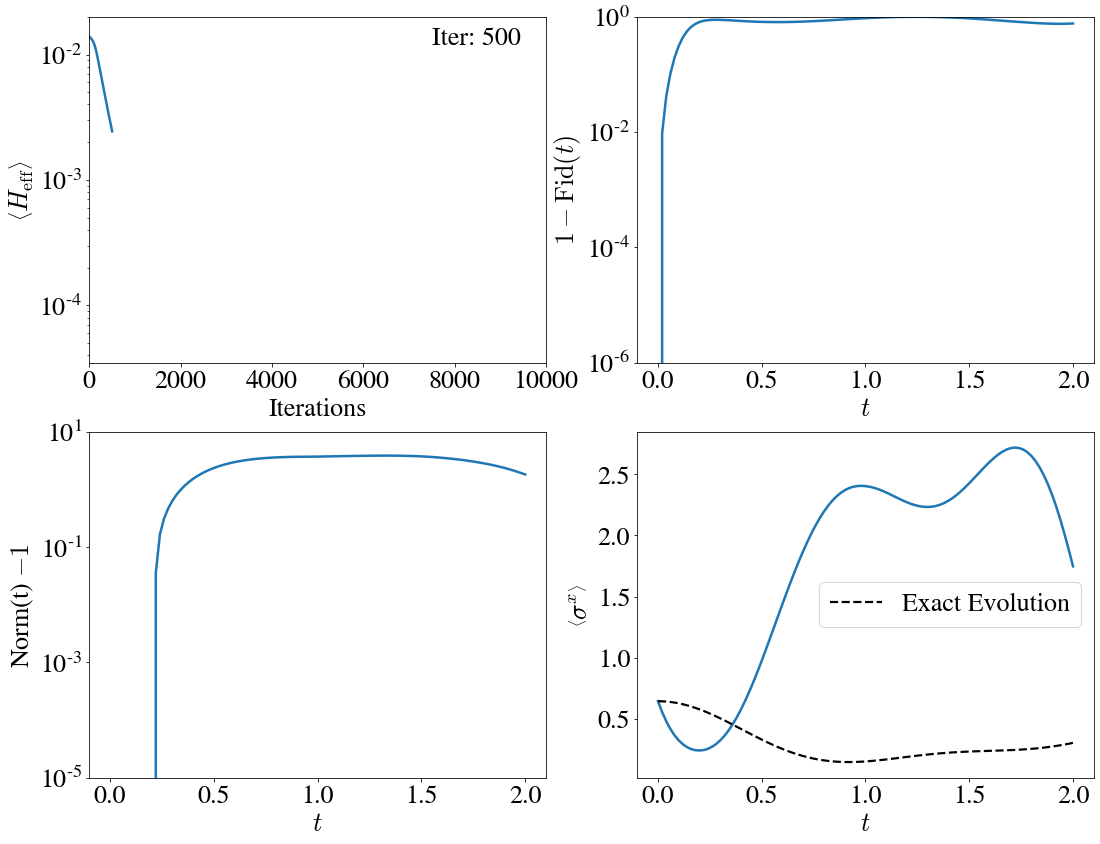

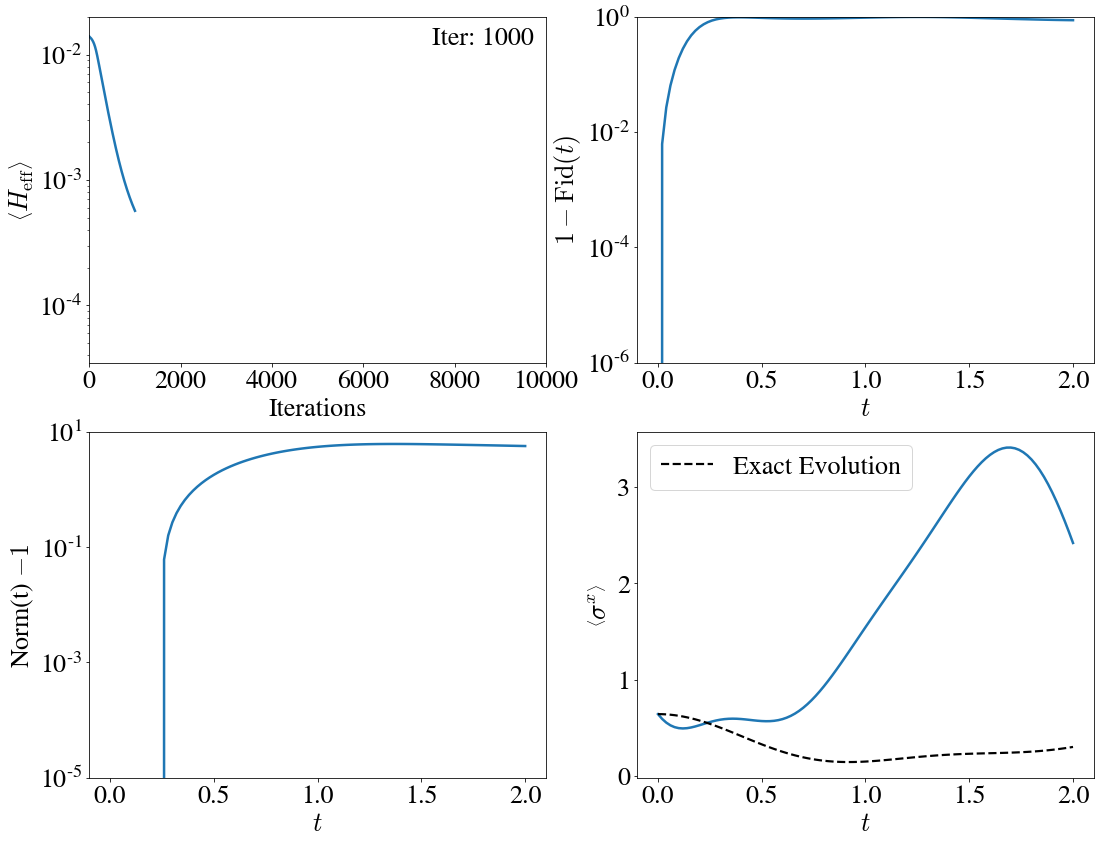

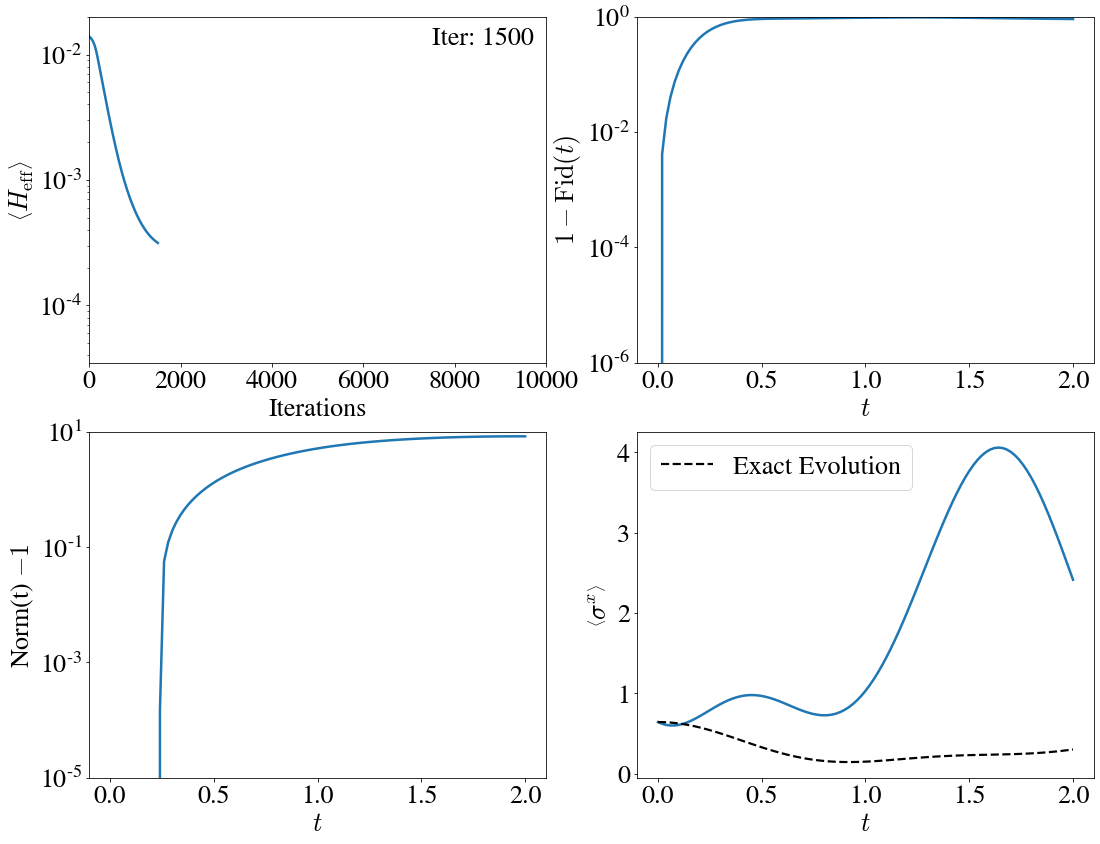

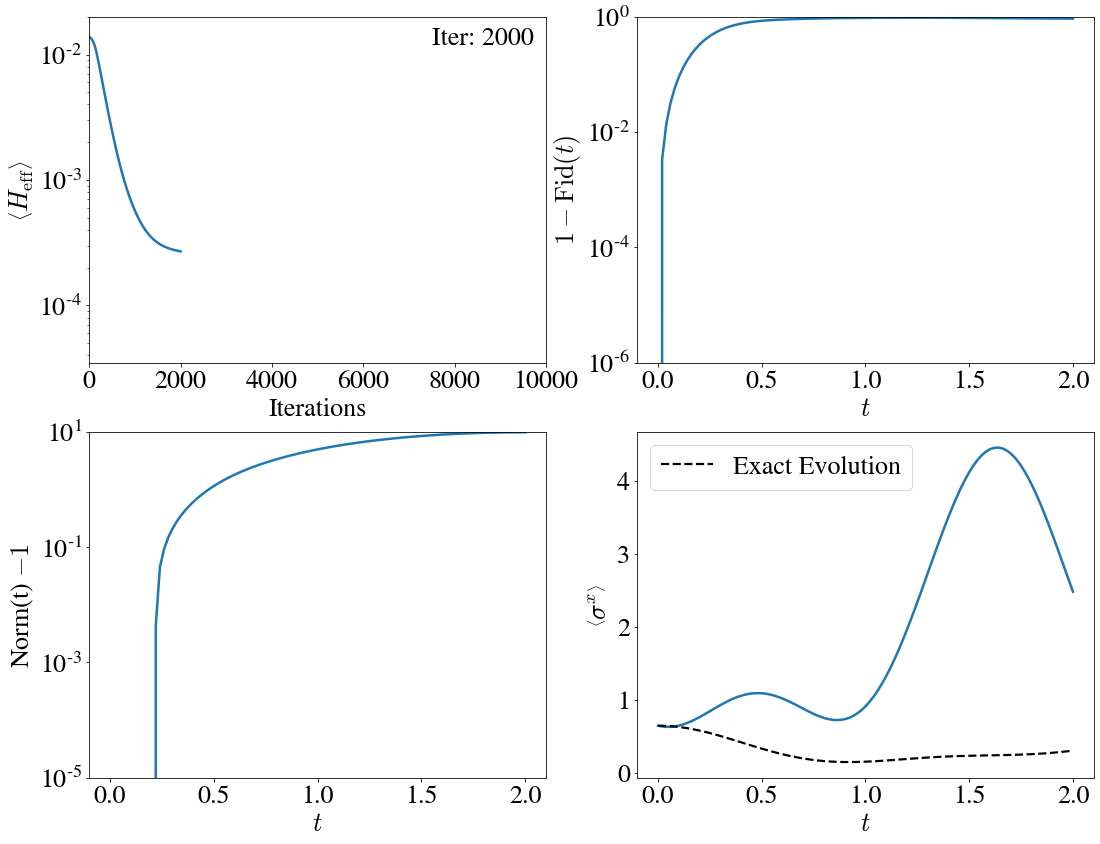

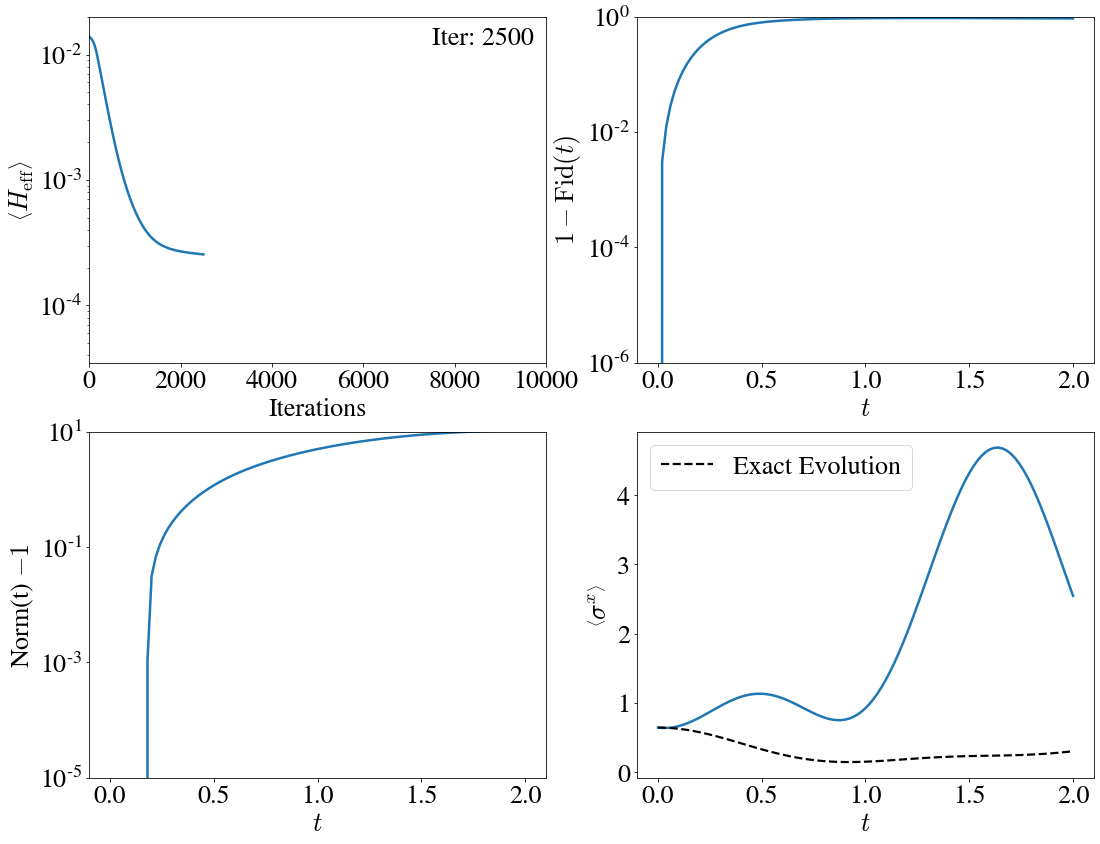

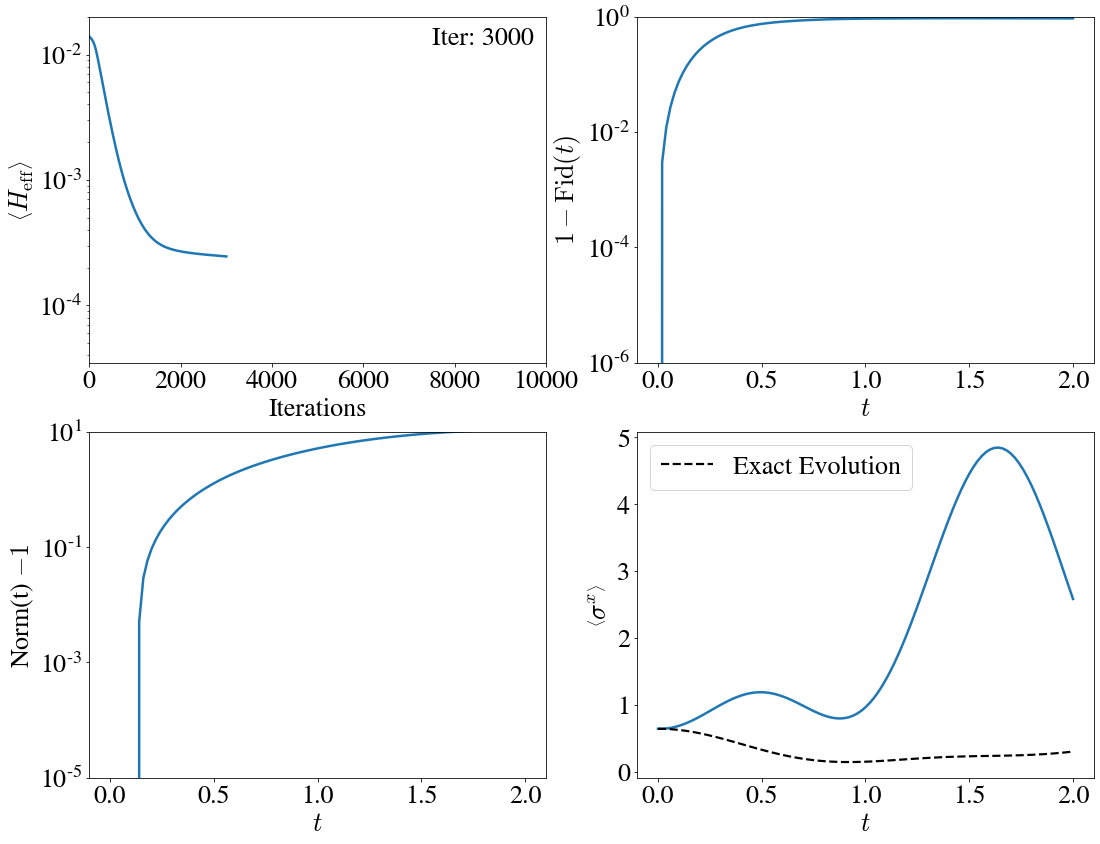

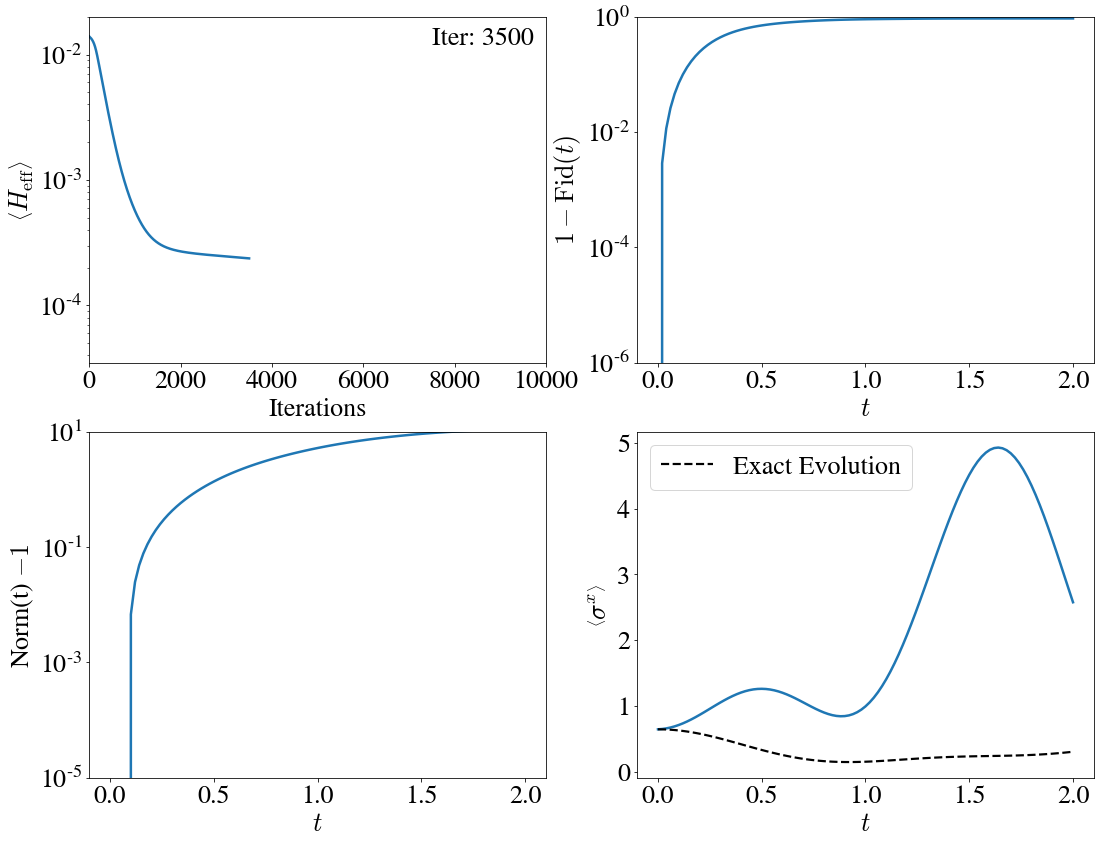

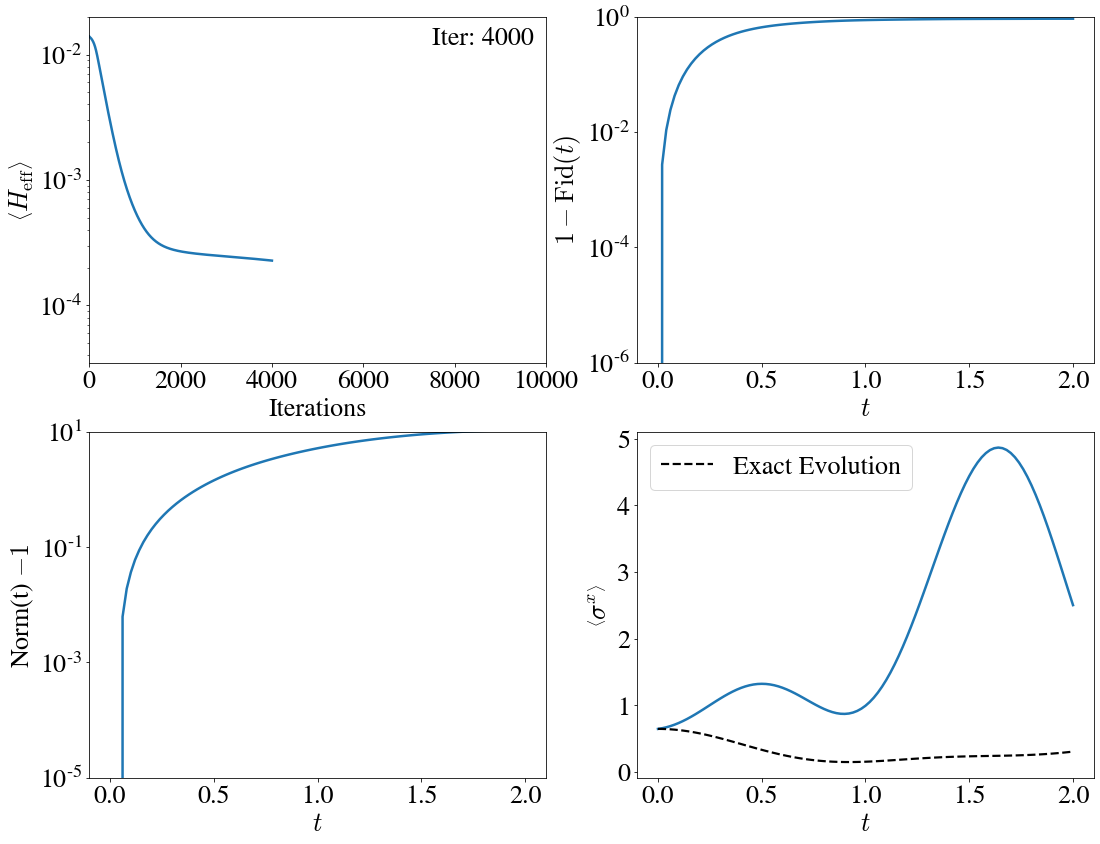

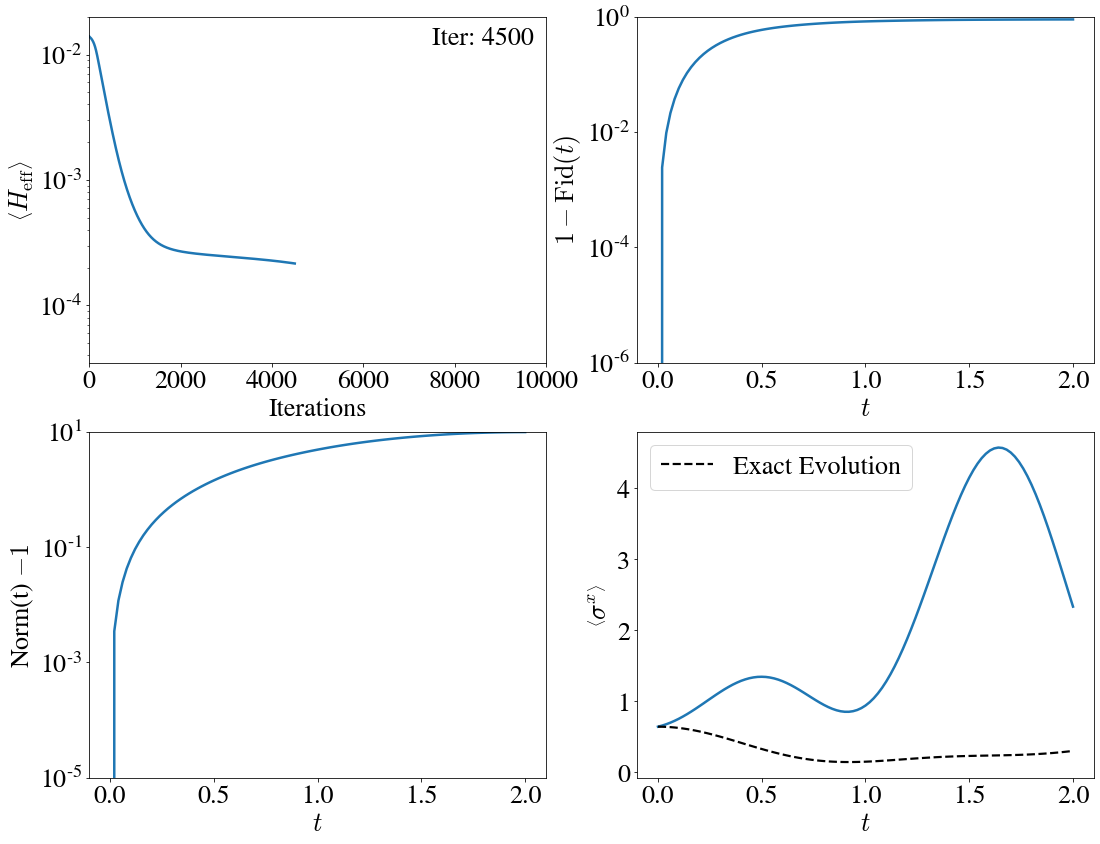

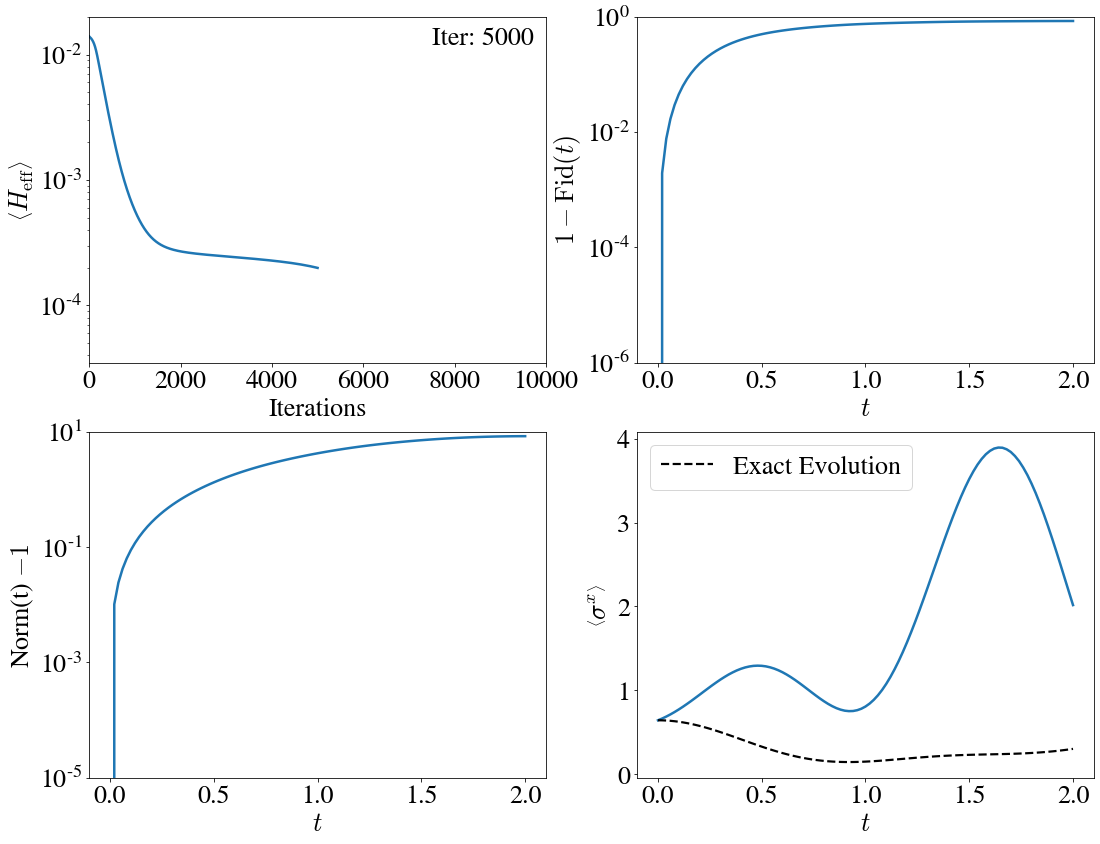

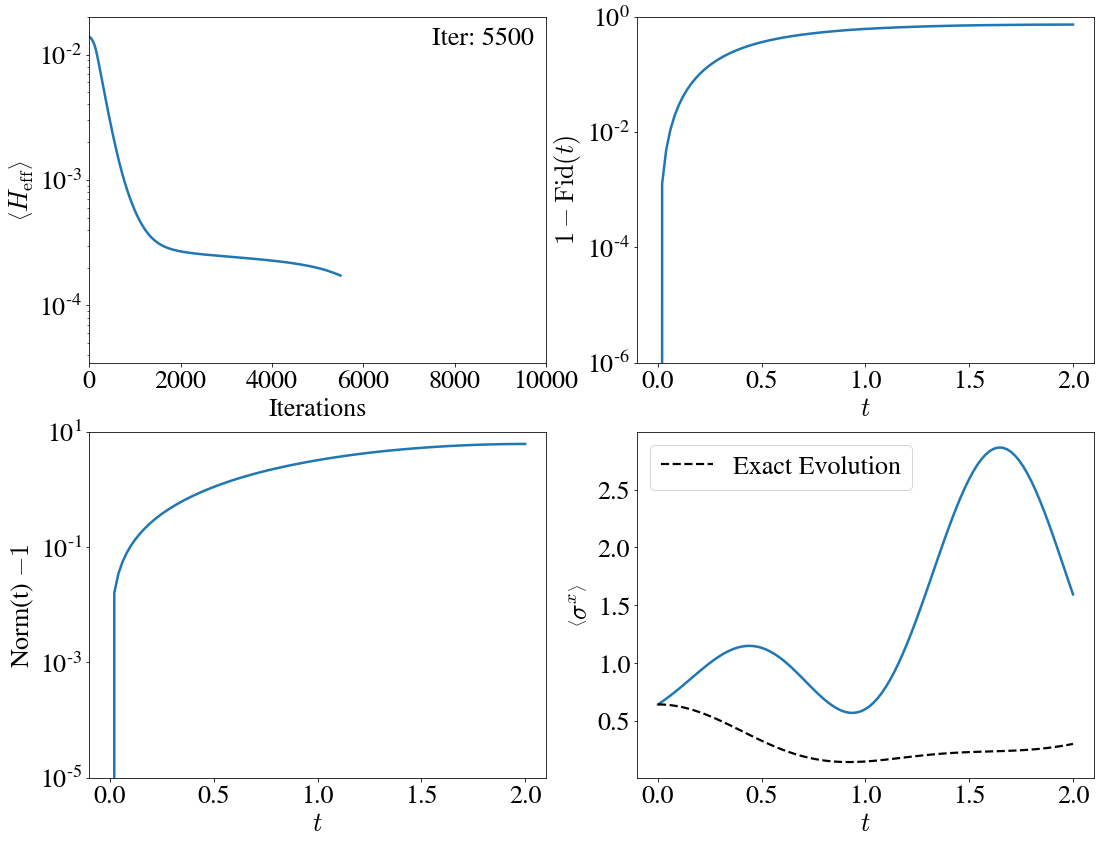

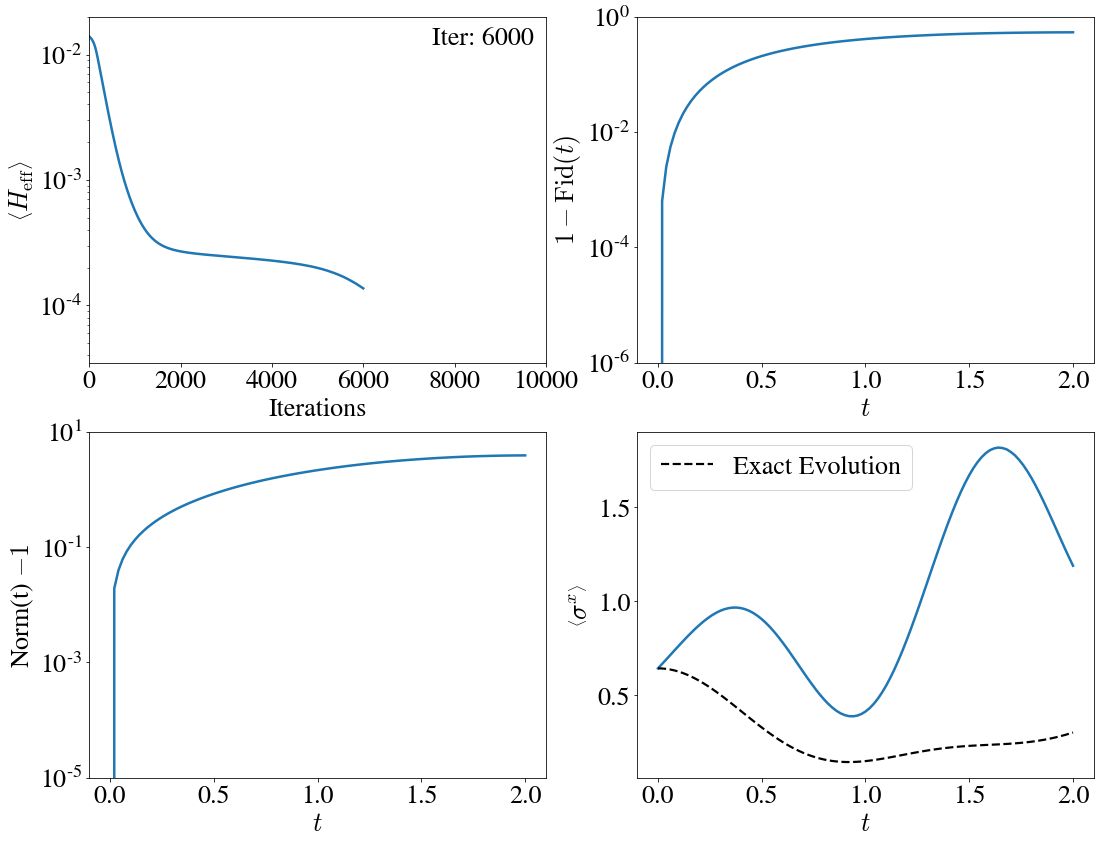

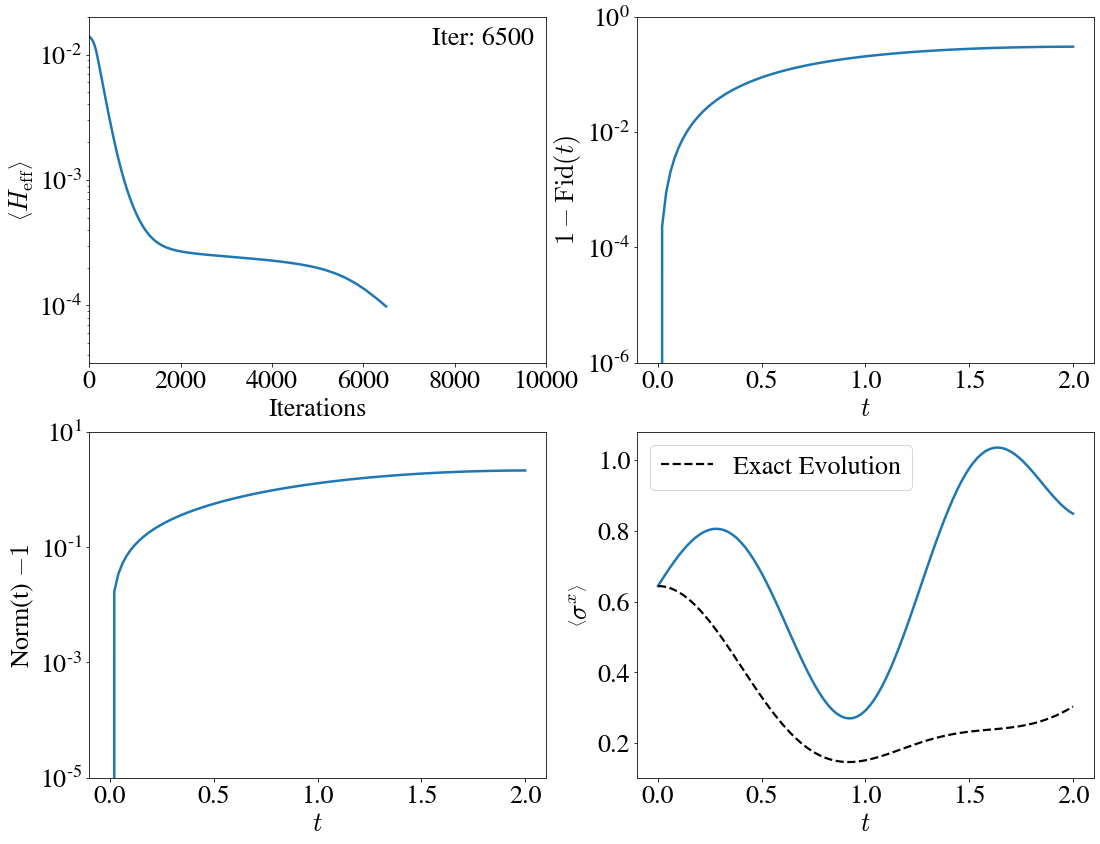

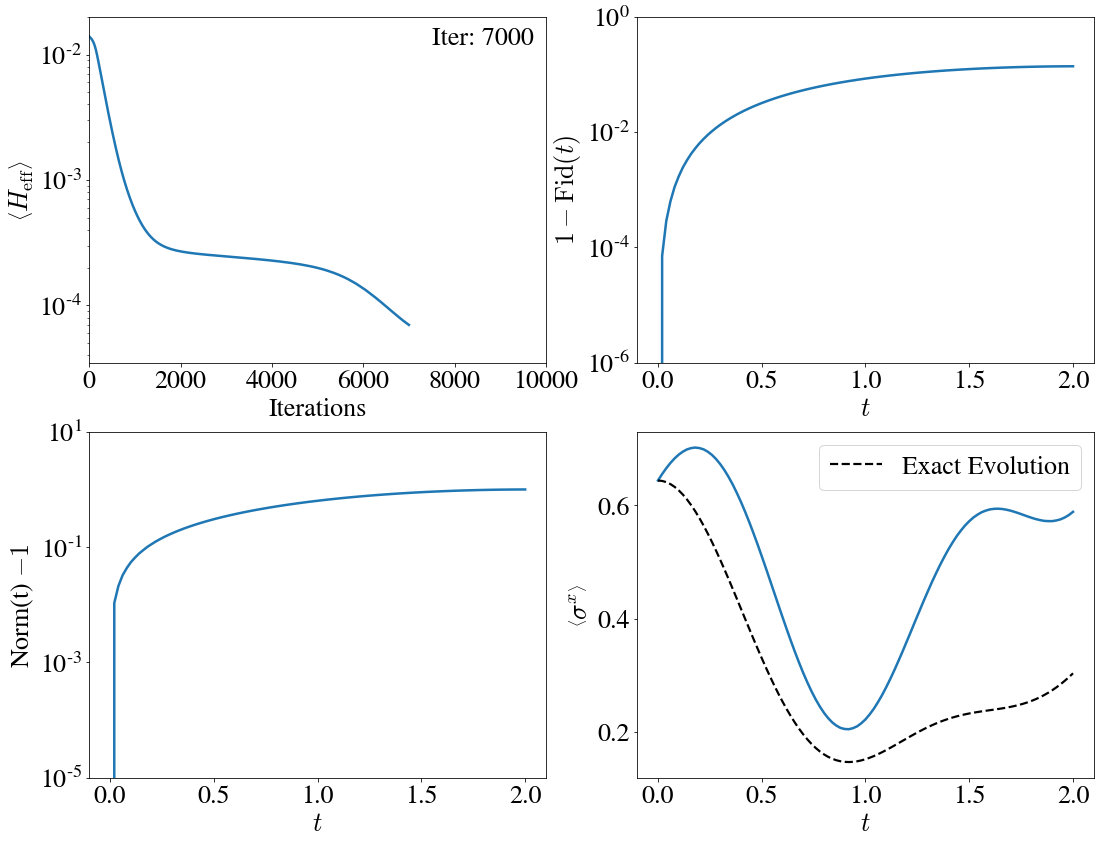

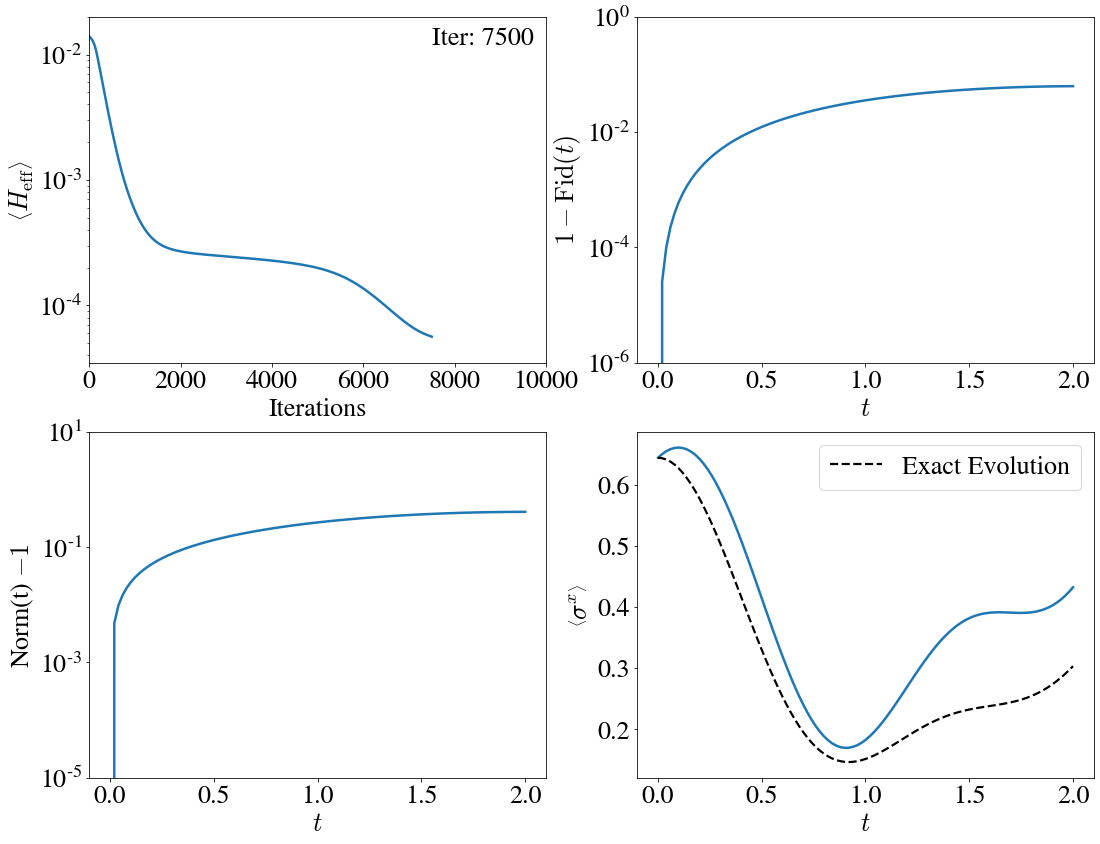

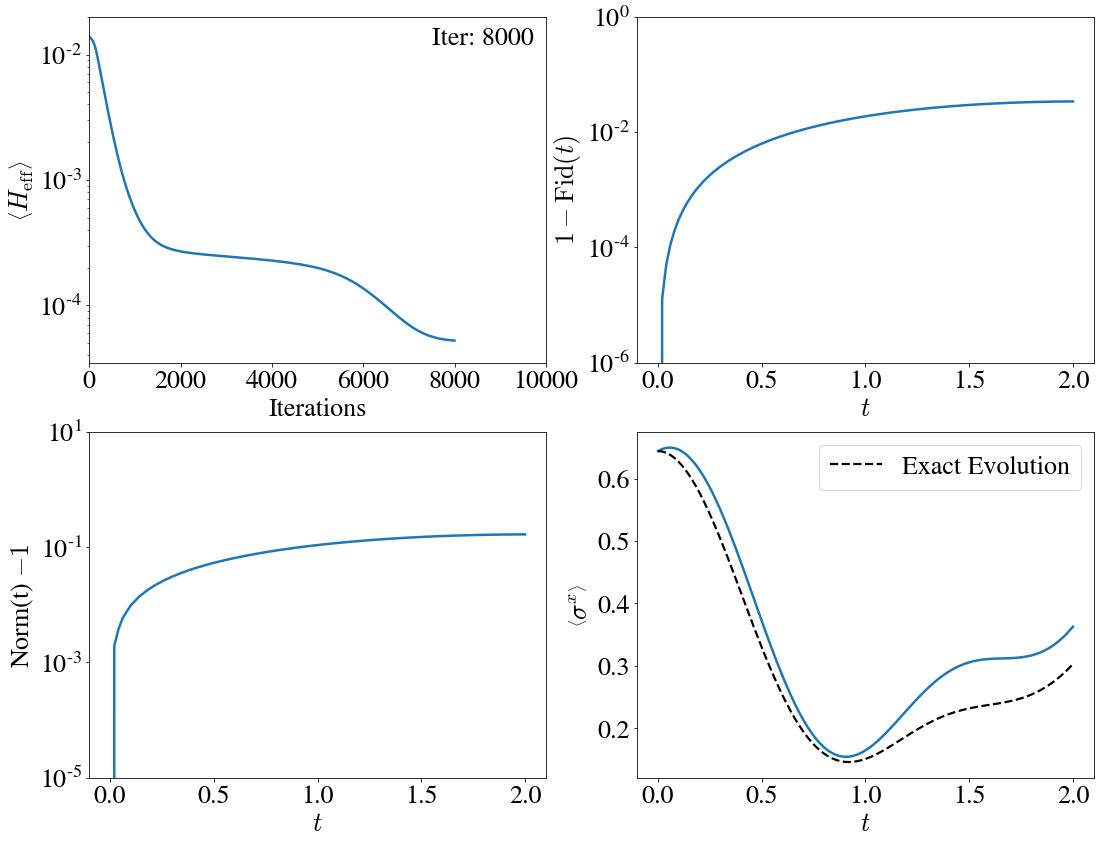

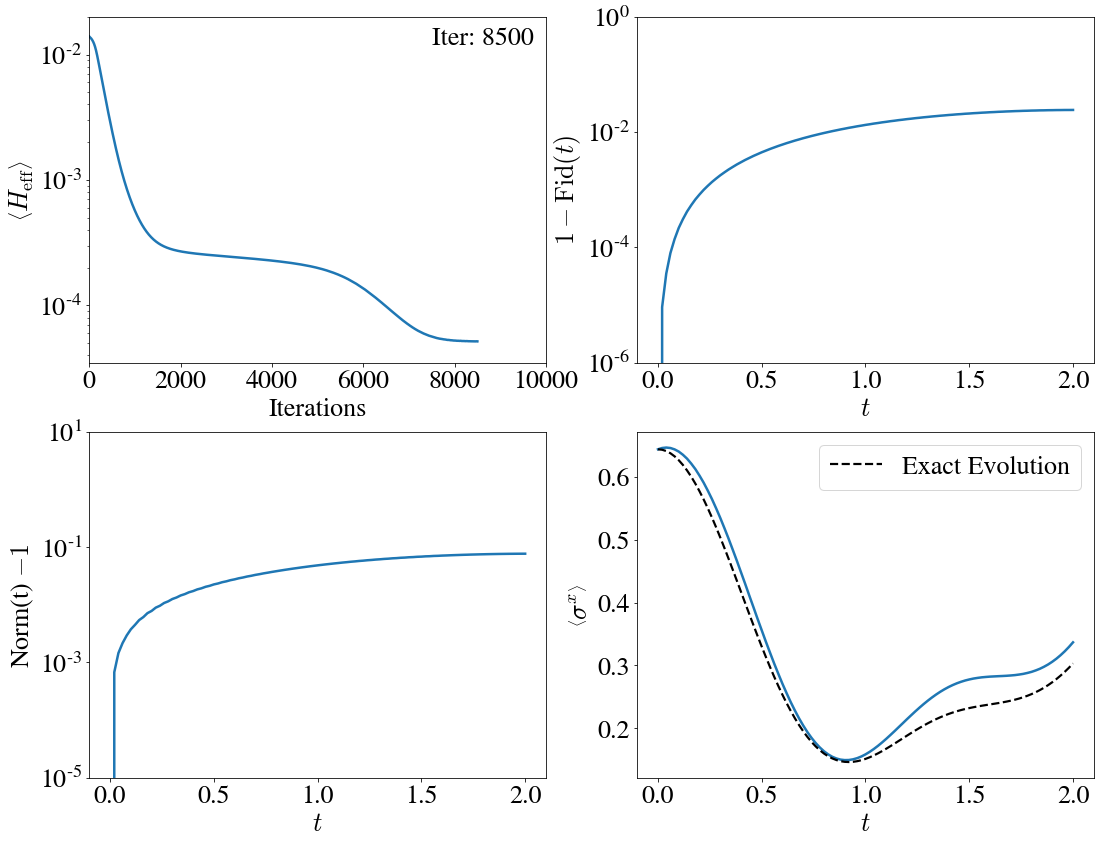

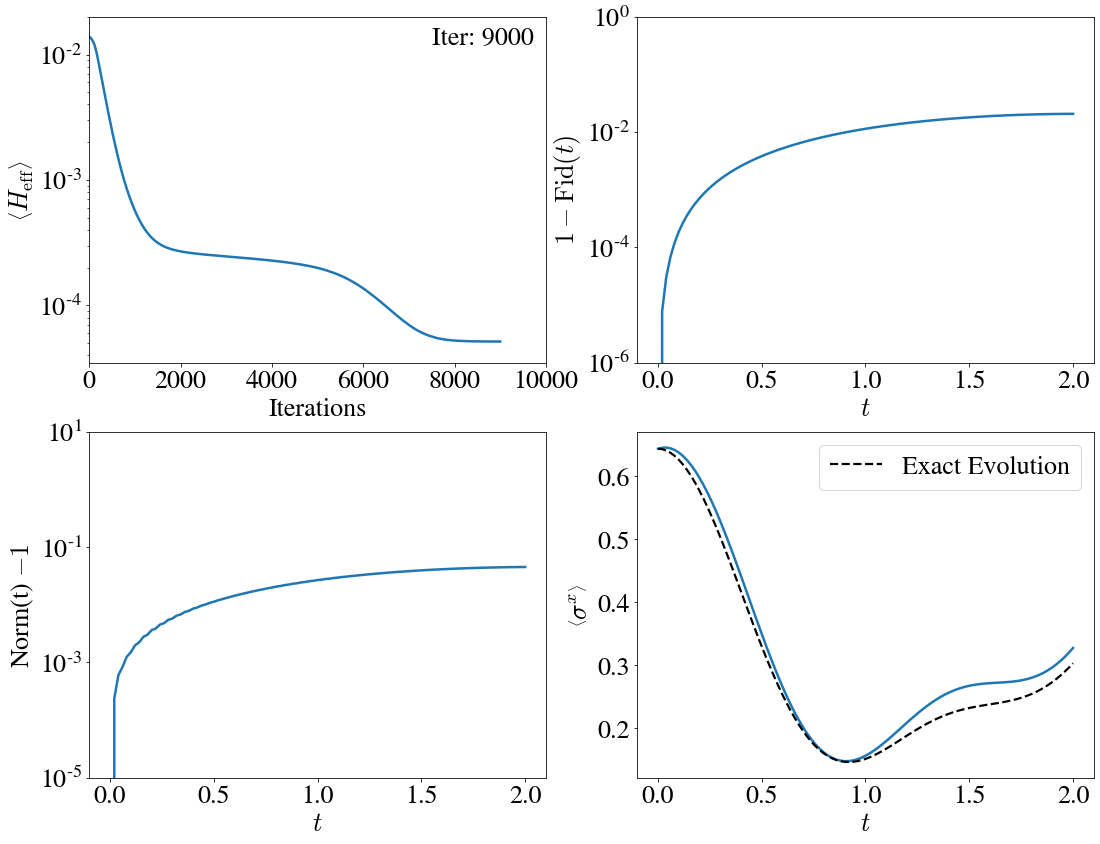

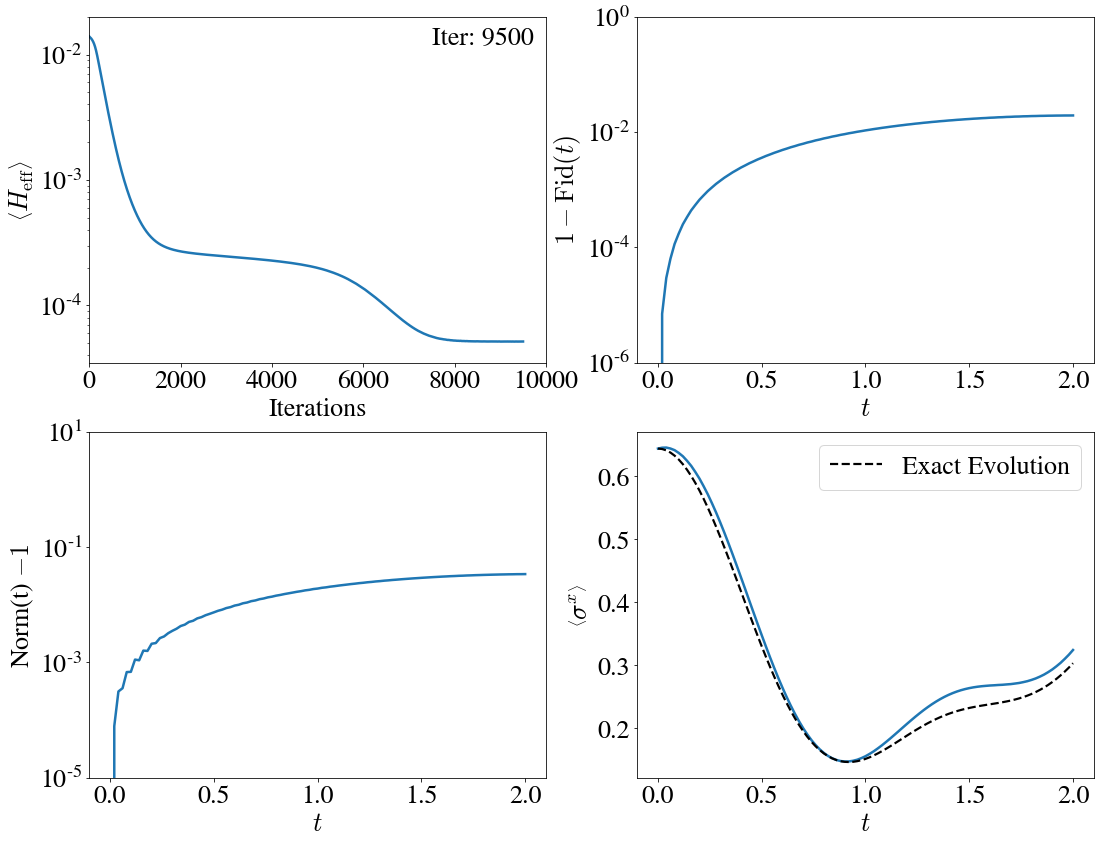

In [109]:
n_sites = 6
time_steps = 100
t_grid = np.linspace(0, 2.0, time_steps + 1)

file = h5py.File("{}/ClockV3/histories/allstates_tf2_withoverlap_fullwv_N{}M{}.h5".format(data_dir, n_sites, time_steps), "r")
n_epochs = len(file["time_overlaps"][()])
step = 500

for i, epoch in enumerate(range(0, n_epochs, step)):
    plt.figure(figsize=(18, 14))
    plt.subplot(221)
    plt.semilogy(file["exact_Eloc"][()][:epoch].real, label="Exact", color=cp[0], linewidth=2.5)
    plt.xlabel("Iterations")
    plt.ylabel(r"$\left \langle H_\mathrm{eff} \right \rangle$")
    plt.xlim([0, n_epochs])
    plt.ylim([3.5 * 1e-5, 2e-2])
    plt.text(7500, 0.012, "Iter: {}".format(epoch))

    plt.subplot(222)
    plt.semilogy(t_grid, 1 - file["time_overlaps"][()][epoch], color=cp[0], linewidth=2.5)
    plt.xlabel("$t$")
    plt.ylabel(r"$1 - \mathrm{Fid}(t)$")
    plt.ylim([1e-6, 1.0])

    plt.subplot(223)
    plt.semilogy(t_grid, file["time_norm"][()][epoch] - 1, color=cp[0], linewidth=2.5)
    plt.xlabel("$t$")
    plt.ylabel(r"Norm(t) $- 1$")
    plt.ylim([1e-5, 10.0])

    plt.subplot(224)
    plt.plot(t_grid, file["time_sigma_x"][()][epoch], color=cp[0], linewidth=2.5)
    plt.plot(t_grid, exact_sigma_x, linewidth=2.2, color="black", linestyle="--", label="Exact Evolution")
    plt.legend()
    plt.xlabel("$t$")
    plt.ylabel(r"$\left \langle \sigma ^x\right \rangle $")
    
    #plt.show()
    plt.savefig("optimization_dynamic-{}.png".format(i))
    #display.clear_output(wait=True)
    #display.display(plt.gcf())

file.close()